In [1]:
import torch

import numpy as np
import scipy.stats as st
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from Tools import NNE, EntropyKDE, KL, JSD
from Models import Generator, GeNetEns

In [2]:
device='cpu'

In [3]:
from Experiments.foong import Setup
layerwidth=50
nblayers=1
setup=Setup(device,layerwidth=layerwidth,nblayers=nblayers)

# Target density #

In [4]:
param_count=setup.param_count
logposterior=setup.logposterior



In [5]:
theta_mixed=torch.load('mlruns/1/eb8a9183fbab4df5b4487f91cfdf9de7/artifacts/theta.pt')[0:-1:4]
theta_sparse=torch.load('mlruns/1/6ad0cb2d83fd45e4bf0158423127e358/artifacts/theta.pt')[0:-1:1]
theta_ood3=torch.load('mlruns/1/5a0b4844d81c45bdad0d82651adafa25/artifacts/theta.pt')[0:-1:1]
theta_ood=torch.load('mlruns/1/80d92de68c0645d38650c6c56116c4a0/artifacts/theta.pt')[0:-1:1]
theta_ood4=torch.load('mlruns/1/b62011b2d434421cb64a2aa82ff74f3c/artifacts/theta.pt')[0:-1:1]
theta_ood2=torch.load('mlruns/1/f74e8ae0ff5c40729a93656e329e27dd/artifacts/theta.pt')

theta=[theta_sparse, theta_ood, theta_mixed]

GeNVI=Generator(5,param_count,device)
Model_dict=torch.load('results/f144be00f4c44877bd8104b576ff6b6f.pt', map_location=torch.device('cpu'))#torch.load('results/f144be00f4c44877bd8104b576ff6b6f.pt', map_location=torch.device('cpu'))

#
#
#GeNVI.load_state_dict(Model_dict['state_dict'])

theta_ood4.shape
Model_dict

{'state_dict': OrderedDict([('model.0.weight',
               tensor([[ 0.0534, -0.2182, -0.0635,  0.1525, -0.1332],
                       [-0.1060, -0.1391,  0.1046,  0.1666, -0.1181],
                       [ 0.0157,  0.0570, -0.3722,  0.1096,  0.1983],
                       [-0.0898, -0.0614, -0.0836, -0.0134, -0.3195],
                       [-0.3944,  0.1965,  0.0383,  0.1186,  0.2668],
                       [ 0.2006, -0.1530,  0.1457,  0.1777,  0.2615],
                       [-0.2847,  0.0549, -0.4253,  0.1421, -0.1536],
                       [-0.1651, -0.1177, -0.2933, -0.3662,  0.3490],
                       [ 0.0322, -0.1282,  0.1688,  0.1181, -0.0137],
                       [ 0.0700,  0.1553,  0.0268,  0.1441, -0.1932],
                       [ 0.1588,  0.1519,  0.1404,  0.0551,  0.0376],
                       [-0.1305, -0.2921,  0.1474, -0.1567,  0.4818],
                       [-0.4354,  0.2285,  0.1493,  0.1581,  0.2721],
                       [-0.0114, -0.0889, -

In [7]:
print(theta_ood2.mean())
print(theta_ood.mean())


tensor(-0.0021)
tensor(-0.0050)


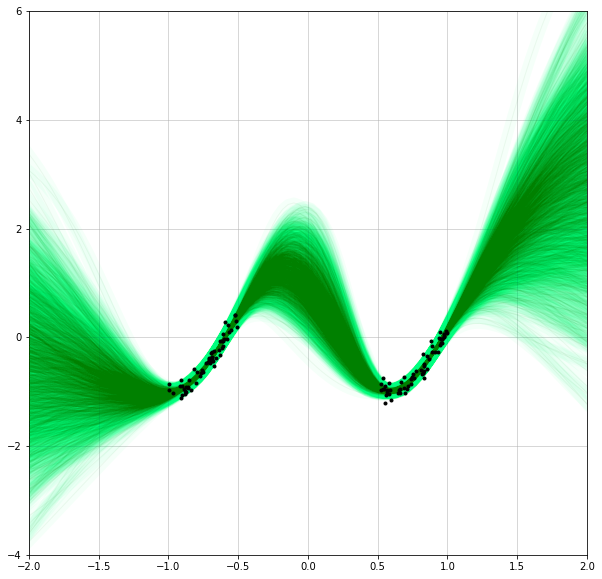

In [9]:
fig=setup.makePlot(theta_ood,device)

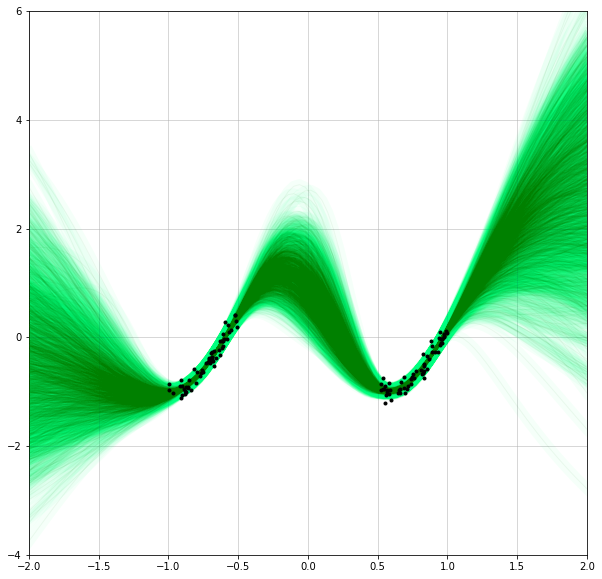

In [10]:
fig=setup.makePlot(theta_ood2,device)

In [11]:
ED = EntropyKDE(theta_ood[0:-1:2],device)
LP = logposterior(theta_ood[0:-1:2]).mean()
L = -ED - LP
print('ENTROPY(HMC):'+str(ED))
print('ELBO(HMC):'+str(L))

ENTROPY(HMC):tensor(146.0363)
ELBO(HMC):tensor(-20.9093)


In [27]:
ED = NNE(theta_ood[0:-1:2],1,1,device)
LP = logposterior(theta_ood[0:-1:2]).mean()
L = -ED - LP
print('ENTROPY(HMC):'+str(ED))
print('ELBO(HMC):'+str(L))

ENTROPY(HMC):tensor(137.1618)
ELBO(HMC):tensor(-12.0348)


In [94]:
print('KL(GeNVI,HMC)='+str(KL(theta_G,theta_ood)))
print('KL(HMC,GeNVI)='+str(KL(theta_ood,theta_G)))
print('JSD(HMC,GeNVI)='+str(.5*KL(theta_ood,theta_G)+.5*KL(theta_G,theta_ood)))


#d=(theta_ood.mean(dim=0)-theta_G.mean(dim=0)).norm()
#print(d)


KL(GeNVI,HMC)=tensor(481.7548)
KL(HMC,GeNVI)=tensor(169.0701)
JSD(HMC,GeNVI)=tensor(325.4124)


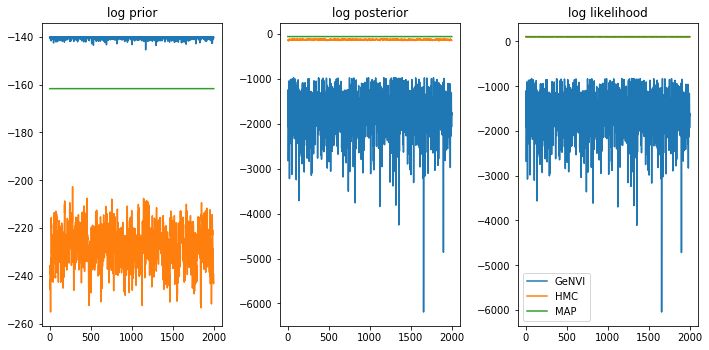

In [23]:
LL=setup.loglikelihood(theta_ood)
LP=setup.logposterior(theta_ood)
LPr=setup.logprior(theta_ood)

theta_G=GeNVI(2000).detach()
LL_G=setup.loglikelihood(theta_G)
LP_G=setup.logposterior(theta_G)
LPr_G=setup.logprior(theta_G)

LL_MAP=setup.loglikelihood(theta_MAP).expand(2000)
LP_MAP=setup.logposterior(theta_MAP).expand(2000)
LPr_MAP=setup.logprior(theta_MAP).expand(2000)


fig, ax=plt.subplots(1,3, figsize=(10,5))

ax[0].plot(LPr_G, label='GeNVI')
ax[0].plot(LPr, label='HMC')
ax[0].plot(LPr_MAP, label='MAP')


ax[0].set_title('log prior')
#plt.ylim(0,110)
#ax[0].set_legend()



ax[1].plot(LP_G, label='GeNVI')

ax[1].plot(LP, label='HMC')
ax[1].plot(T,LP_MAP, label='MAP')
ax[1].set_title('log posterior')
#plt.ylim(0,110)





ax[2].plot(LL_G, label='GeNVI')
ax[2].plot(LL, label='HMC')
ax[2].plot(LL_MAP, label='MAP')


ax[2].set_title('log likelihood')
#plt.ylim(0,110)
#ax[2].set_legend()

plt.legend()

plt.tight_layout(pad=1.2)



tensor(0.3139)


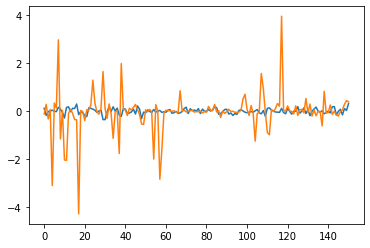

In [38]:
ZZ_G=theta_G.mean(dim=0)
ZZ=theta_ood.mean(dim=0)
plt.plot(ZZ)
plt.plot(ZZ_G)
print(ZZ[-1])

In [12]:
X=torch.arange(-2,2,0.027).to(device)
print('inputs X: '+str(X.shape[0])+' evenly spaced points in [-2,2]')
pred_G=setup.prediction(X,theta_ood2)
pred_HMC=setup.prediction(X,theta_ood)
print('KL(GeNVI_X,HMC_X)='+str(KL(pred_G,pred_HMC)))
print('KL(HMC_X,GeNVI_X)='+str(KL(pred_HMC,pred_G)))
print('JSD(HMC_X,GeNVI_X)='+str(.5*(KL(pred_HMC,pred_G)+KL(pred_G,pred_HMC))))

inputs X: 149 evenly spaced points in [-2,2]
149
KL(GeNVI_X,HMC_X)=tensor(-1.4150)
149
KL(HMC_X,GeNVI_X)=tensor(1.4374)
149
149
JSD(HMC_X,GeNVI_X)=tensor(0.0112)


In [20]:
pred0=pred_G[0:-1:2,:]
pred1=pred_HMC[0:-1:2,:]

torch.save(pred0,'pred0.pt')
torch.save(pred1,'pred1.pt')

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


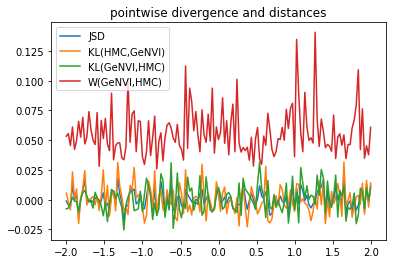

In [19]:
import scipy.stats as st

X=torch.arange(-2,2,0.027)
n_X=X.shape[0]
pred0=torch.randn(1000,n_X) #1000 functions x n_X inputs
pred1=torch.randn(1000,n_X) #1000 functions x n_X inputs


J=torch.Tensor(X.shape[0])
K=torch.Tensor(X.shape[0])
K_=torch.Tensor(X.shape[0])
W=torch.Tensor(X.shape[0])



for x in range(X.shape[0]):
    K[x]=KL(pred0[:,x].unsqueeze(-1),pred1[:,x].unsqueeze(-1),k=30)
    K_[x]=KL(pred1[:,x].unsqueeze(-1),pred0[:,x].unsqueeze(-1),k=30)
    W[x]=st.wasserstein_distance(pred0[:,x],pred1[:,x])

J=0.5*(K+K_)

plt.plot(X,J, label='JSD')
plt.plot(X,K,  label='KL(HMC,GeNVI)')
plt.plot(X,K_,  label='KL(GeNVI,HMC)')
plt.plot(X,W,  label='W(GeNVI,HMC)')
plt.title('pointwise divergence and distances')
plt.legend()


In [107]:
pred_G[:,0].unsqueeze(-1).shape

torch.Size([2000, 1])

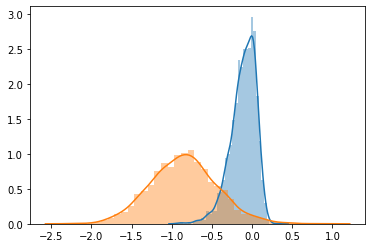

In [42]:
import seaborn as sns
sns.distplot(pred_G[:,20])
sns.distplot(pred_HMC[:,20])

In [35]:


J=torch.Tensor(X.shape[0])
K=torch.Tensor(X.shape[0])
K_=torch.Tensor(X.shape[0])
W=torch.Tensor(X.shape[0])




def JSD(X,Y):
    return 0.5*(KL(X,Y,k=20)+KL(Y,X,k=20))

for x in range(X.shape[0]):
    K[x]=KL(pred_HMC[:,x].unsqueeze(-1),pred_G[:,x].unsqueeze(-1),k=30)
    K_[x]=KL(pred_G[:,x].unsqueeze(-1),pred_HMC[:,x].unsqueeze(-1),k=30)
    W[x]=st.wasserstein_distance(pred_G[:,x],pred_HMC[:,x])

J=0.5*(K+K_)

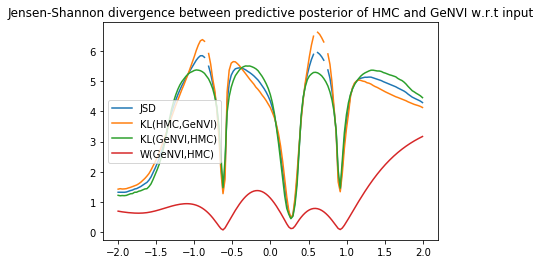

In [36]:
plt.plot(X,J, label='JSD')
plt.plot(X,K,  label='KL(HMC,GeNVI)')
plt.plot(X,K_,  label='KL(GeNVI,HMC)')
plt.plot(X,W,  label='W(GeNVI,HMC)')
plt.title('Jensen-Shannon divergence between predictive posterior of HMC and GeNVI w.r.t input')
plt.legend()

In [46]:
theta_G.mean(dim=0).norm()

tensor(10.1574)

tensor(0.1561)


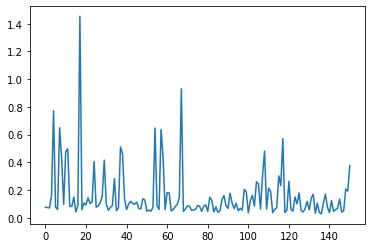

In [33]:
std=theta_G.std(dim=0)
plt.plot(std)
print(std.mean())

tensor([ 0.0492, -0.1771, -0.0306, -0.0336,  0.0400, -0.0619,  0.0214,  0.1711,
         0.1337, -0.0667, -0.2198,  0.1958,  0.2140, -0.0415,  0.0700,  0.1332,
         0.3533, -0.1969,  0.0164,  0.0413, -0.0997, -0.3078,  0.0922,  0.0078,
         0.1074,  0.0043, -0.0608, -0.0243,  0.1484, -0.2894, -0.3473,  0.0486,
         0.1639, -0.0314,  0.2419, -0.0282,  0.1268, -0.1434, -0.3506,  0.1060,
        -0.0053, -0.0549, -0.1651, -0.1041,  0.2002, -0.0726,  0.2040,  0.1049,
        -0.3742,  0.0154, -0.0511,  0.0281, -0.0141, -0.0526,  0.1193,  0.0027,
         0.0169,  0.0479, -0.0621, -0.0668, -0.1024,  0.0091,  0.1103, -0.1680,
        -0.1387, -0.0039, -0.0806,  0.0049, -0.0154,  0.0616,  0.1153, -0.0827,
         0.1556,  0.0581, -0.0039, -0.0535,  0.1613, -0.0947,  0.1237, -0.0428,
        -0.0406,  0.0917,  0.0449,  0.1223,  0.2289,  0.1698, -0.1151,  0.0232,
        -0.0253,  0.0166, -0.0572, -0.0922, -0.0307, -0.1942, -0.0862, -0.1858,
         0.0116,  0.0559,  0.0310, -0.09

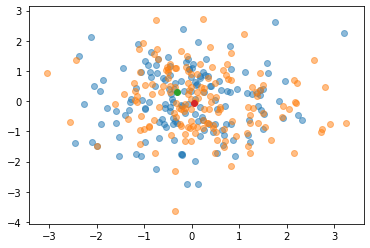

In [11]:
diff=theta_ood.mean(dim=0)-theta_ood2.mean(dim=0)
_,index =diff.abs().sort()
print(diff)
print(index)

plt.scatter(theta_ood[index[-1]],theta_ood[index[-2]],alpha=0.5)
plt.scatter(theta_ood2[index[-1]],theta_ood2[index[-2]],alpha=0.5)
plt.scatter(theta_ood.mean(dim=0)[index[-1]],theta_ood.mean(dim=0)[index[-2]])
plt.scatter(theta_ood2.mean(dim=0)[index[-1]],theta_ood2.mean(dim=0)[index[-2]])

In [18]:
from sklearn.manifold import TSNE
theta1=theta_ood
theta2=theta_ood2
theta_all=torch.cat([theta1, theta2])
theta_c=torch.cat([0.1*torch.ones(theta1.shape[0]),0.5*torch.ones(theta2.shape[0])])
myTSNE=TSNE(n_components=2,init='pca',perplexity=100)
X_embedded_ =myTSNE.fit_transform(theta_all.cpu())
print(myTSNE.kl_divergence_)
X_embedded_.shape

1.8333433866500854


(3998, 2)

In [19]:
X_embedded_[:,0].shape

(3998,)

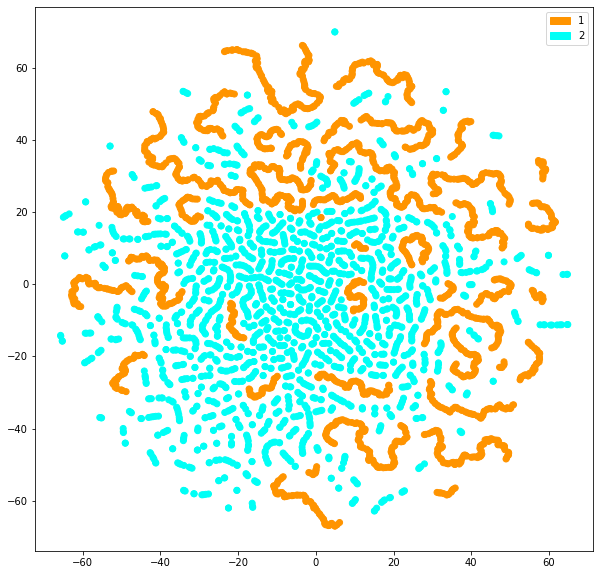

In [20]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import matplotlib.patches as mpatches

import matplotlib.cm as cm
cmap = cm.hsv


fig, ax = plt.subplots(figsize=(10, 10))




G1_patch = mpatches.Patch(color=cmap(.1), label='1')
G2_patch = mpatches.Patch(color=cmap(.5), label='2')
#G3_patch = mpatches.Patch(color=cmap(.2), label='G3')



#ax = fig.gca(projection='3d')
plt.scatter(X_embedded_[:,0],X_embedded_[:,1],
           #X_embedded_[:,2],
           color=cmap(theta_c), 
           #linewidth=0.2,
           cmap=cmap)


#ax.view_init(elev=20., azim=170)

plt.legend(handles=[G1_patch,G2_patch])
#plt.legend(handles=[G1_patch,G2_patch,G3_patch])
plt.savefig('tSNE.pdf')
plt.show()

In [82]:


X=torch.arange(-2,2,0.02).to(device)

pred=[setup.prediction(X,theta[i]) for i in range(len(theta))]
pred[0].shape

torch.Size([1998, 200])

In [67]:
pred_=pred[0][0:-1:2]
ED=[]
ED_=[]
for i in range(len(theta)):
    pred_=pred[i]
    K=torch.Tensor(X.shape[0])
    KK=torch.Tensor(X.shape[0])
    for x in range(X.shape[0]):
        K[x]=NNE(pred_[:,x].unsqueeze(-1),10,device)#
        KK[x]=EntropyKDE(pred_[:,x].unsqueeze(-1),device)
    ED.append(K)
    ED_.append(KK)
    
    

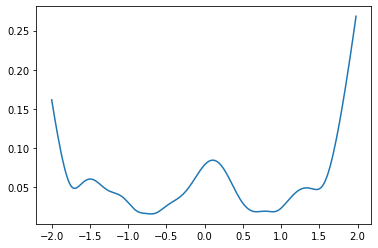

In [91]:
plt.plot(X,pred[2].std(dim=0))
    
    

In [22]:
for i in range(len(theta)):
    print(emcee.autocorr.integrated_time(theta[i], c=5, tol=50, quiet=False))

[6.30528152]
[18.79204281]
[31.99413624]


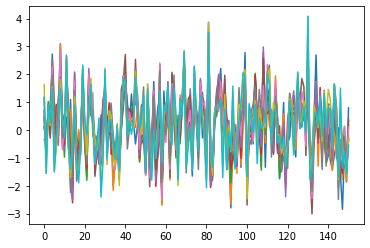

In [94]:
%matplotlib inline
for i in range(10):#theta.shape[1]):
    plt.plot(theta[i])

In [16]:
from Inference.PointEstimate import AdamGradientDescent
def _MAP(nbiter, std_init,logposterior, dim, device=device):
        optimizer = AdamGradientDescent(logposterior, nbiter, .01, .00000001, 50, .5, device, True)

        theta0 = torch.empty((1, dim), device=device).normal_(0., std=std_init)
        best_theta, best_score, score = optimizer.run(theta0)

        return best_theta.detach().clone()

theta_MAP=_MAP(10000,1., logposterior, param_count)

Epoch [1/10000], Loss: 24004.5078125, Learning Rate: 0.01
Epoch [2/10000], Loss: 13865.181640625, Learning Rate: 0.01
Epoch [3/10000], Loss: 6769.12451171875, Learning Rate: 0.01
Epoch [4/10000], Loss: 2622.677978515625, Learning Rate: 0.01
Epoch [5/10000], Loss: 1093.5416259765625, Learning Rate: 0.01
Epoch [6/10000], Loss: 1522.499755859375, Learning Rate: 0.01
Epoch [7/10000], Loss: 2974.791259765625, Learning Rate: 0.01
Epoch [8/10000], Loss: 4500.9873046875, Learning Rate: 0.01
Epoch [9/10000], Loss: 5451.61376953125, Learning Rate: 0.01
Epoch [10/10000], Loss: 5599.865234375, Learning Rate: 0.01
Epoch [11/10000], Loss: 5047.74853515625, Learning Rate: 0.01
Epoch [12/10000], Loss: 4061.870361328125, Learning Rate: 0.01
Epoch [13/10000], Loss: 2943.45654296875, Learning Rate: 0.01
Epoch [14/10000], Loss: 1950.849365234375, Learning Rate: 0.01
Epoch [15/10000], Loss: 1259.0799560546875, Learning Rate: 0.01
Epoch [16/10000], Loss: 942.8719482421875, Learning Rate: 0.01
Epoch [17/1000

Epoch [139/10000], Loss: 153.50802612304688, Learning Rate: 0.01
Epoch [140/10000], Loss: 153.13650512695312, Learning Rate: 0.01
Epoch [141/10000], Loss: 152.7817840576172, Learning Rate: 0.01
Epoch [142/10000], Loss: 152.44520568847656, Learning Rate: 0.01
Epoch [143/10000], Loss: 152.12652587890625, Learning Rate: 0.01
Epoch [144/10000], Loss: 151.82443237304688, Learning Rate: 0.01
Epoch [145/10000], Loss: 151.53652954101562, Learning Rate: 0.01
Epoch [146/10000], Loss: 151.26065063476562, Learning Rate: 0.01
Epoch [147/10000], Loss: 150.99578857421875, Learning Rate: 0.01
Epoch [148/10000], Loss: 150.7419891357422, Learning Rate: 0.01
Epoch [149/10000], Loss: 150.49948120117188, Learning Rate: 0.01
Epoch [150/10000], Loss: 150.26841735839844, Learning Rate: 0.01
Epoch [151/10000], Loss: 150.04811096191406, Learning Rate: 0.01
Epoch [152/10000], Loss: 149.83731079101562, Learning Rate: 0.01
Epoch [153/10000], Loss: 149.63485717773438, Learning Rate: 0.01
Epoch [154/10000], Loss: 14

Epoch [270/10000], Loss: 137.68722534179688, Learning Rate: 0.01
Epoch [271/10000], Loss: 137.59457397460938, Learning Rate: 0.01
Epoch [272/10000], Loss: 137.50204467773438, Learning Rate: 0.01
Epoch [273/10000], Loss: 137.40953063964844, Learning Rate: 0.01
Epoch [274/10000], Loss: 137.31695556640625, Learning Rate: 0.01
Epoch [275/10000], Loss: 137.22454833984375, Learning Rate: 0.01
Epoch [276/10000], Loss: 137.132080078125, Learning Rate: 0.01
Epoch [277/10000], Loss: 137.03948974609375, Learning Rate: 0.01
Epoch [278/10000], Loss: 136.947021484375, Learning Rate: 0.01
Epoch [279/10000], Loss: 136.85458374023438, Learning Rate: 0.01
Epoch [280/10000], Loss: 136.76220703125, Learning Rate: 0.01
Epoch [281/10000], Loss: 136.66976928710938, Learning Rate: 0.01
Epoch [282/10000], Loss: 136.57742309570312, Learning Rate: 0.01
Epoch [283/10000], Loss: 136.48507690429688, Learning Rate: 0.01
Epoch [284/10000], Loss: 136.39271545410156, Learning Rate: 0.01
Epoch [285/10000], Loss: 136.300

Epoch [429/10000], Loss: 124.17219543457031, Learning Rate: 0.01
Epoch [430/10000], Loss: 124.10118103027344, Learning Rate: 0.01
Epoch [431/10000], Loss: 124.0303726196289, Learning Rate: 0.01
Epoch [432/10000], Loss: 123.9598159790039, Learning Rate: 0.01
Epoch [433/10000], Loss: 123.88945770263672, Learning Rate: 0.01
Epoch [434/10000], Loss: 123.81947326660156, Learning Rate: 0.01
Epoch [435/10000], Loss: 123.74952697753906, Learning Rate: 0.01
Epoch [436/10000], Loss: 123.67988586425781, Learning Rate: 0.01
Epoch [437/10000], Loss: 123.61050415039062, Learning Rate: 0.01
Epoch [438/10000], Loss: 123.54129791259766, Learning Rate: 0.01
Epoch [439/10000], Loss: 123.47238159179688, Learning Rate: 0.01
Epoch [440/10000], Loss: 123.40357971191406, Learning Rate: 0.01
Epoch [441/10000], Loss: 123.33514404296875, Learning Rate: 0.01
Epoch [442/10000], Loss: 123.26685333251953, Learning Rate: 0.01
Epoch [443/10000], Loss: 123.19873046875, Learning Rate: 0.01
Epoch [444/10000], Loss: 123.1

Epoch [586/10000], Loss: 115.51449584960938, Learning Rate: 0.01
Epoch [587/10000], Loss: 115.47240447998047, Learning Rate: 0.01
Epoch [588/10000], Loss: 115.43034362792969, Learning Rate: 0.01
Epoch [589/10000], Loss: 115.38844299316406, Learning Rate: 0.01
Epoch [590/10000], Loss: 115.34672546386719, Learning Rate: 0.01
Epoch [591/10000], Loss: 115.30502319335938, Learning Rate: 0.01
Epoch [592/10000], Loss: 115.26345825195312, Learning Rate: 0.01
Epoch [593/10000], Loss: 115.22209930419922, Learning Rate: 0.01
Epoch [594/10000], Loss: 115.1808090209961, Learning Rate: 0.01
Epoch [595/10000], Loss: 115.13948822021484, Learning Rate: 0.01
Epoch [596/10000], Loss: 115.09843444824219, Learning Rate: 0.01
Epoch [597/10000], Loss: 115.05753326416016, Learning Rate: 0.01
Epoch [598/10000], Loss: 115.01663970947266, Learning Rate: 0.01
Epoch [599/10000], Loss: 114.97587585449219, Learning Rate: 0.01
Epoch [600/10000], Loss: 114.93529510498047, Learning Rate: 0.01
Epoch [601/10000], Loss: 1

Epoch [730/10000], Loss: 110.39717102050781, Learning Rate: 0.01
Epoch [731/10000], Loss: 110.36676788330078, Learning Rate: 0.01
Epoch [732/10000], Loss: 110.3363037109375, Learning Rate: 0.01
Epoch [733/10000], Loss: 110.30599212646484, Learning Rate: 0.01
Epoch [734/10000], Loss: 110.275634765625, Learning Rate: 0.01
Epoch [735/10000], Loss: 110.245361328125, Learning Rate: 0.01
Epoch [736/10000], Loss: 110.21524810791016, Learning Rate: 0.01
Epoch [737/10000], Loss: 110.18505859375, Learning Rate: 0.01
Epoch [738/10000], Loss: 110.15499877929688, Learning Rate: 0.01
Epoch [739/10000], Loss: 110.12491607666016, Learning Rate: 0.01
Epoch [740/10000], Loss: 110.09490966796875, Learning Rate: 0.01
Epoch [741/10000], Loss: 110.06494140625, Learning Rate: 0.01
Epoch [742/10000], Loss: 110.03509521484375, Learning Rate: 0.01
Epoch [743/10000], Loss: 110.00518798828125, Learning Rate: 0.01
Epoch [744/10000], Loss: 109.9754409790039, Learning Rate: 0.01
Epoch [745/10000], Loss: 109.94566345

Epoch [868/10000], Loss: 106.62686920166016, Learning Rate: 0.01
Epoch [869/10000], Loss: 106.60247039794922, Learning Rate: 0.01
Epoch [870/10000], Loss: 106.57805633544922, Learning Rate: 0.01
Epoch [871/10000], Loss: 106.55358123779297, Learning Rate: 0.01
Epoch [872/10000], Loss: 106.52928161621094, Learning Rate: 0.01
Epoch [873/10000], Loss: 106.50494384765625, Learning Rate: 0.01
Epoch [874/10000], Loss: 106.48063659667969, Learning Rate: 0.01
Epoch [875/10000], Loss: 106.45641326904297, Learning Rate: 0.01
Epoch [876/10000], Loss: 106.43225860595703, Learning Rate: 0.01
Epoch [877/10000], Loss: 106.40800476074219, Learning Rate: 0.01
Epoch [878/10000], Loss: 106.38399505615234, Learning Rate: 0.01
Epoch [879/10000], Loss: 106.35989379882812, Learning Rate: 0.01
Epoch [880/10000], Loss: 106.33572387695312, Learning Rate: 0.01
Epoch [881/10000], Loss: 106.31177520751953, Learning Rate: 0.01
Epoch [882/10000], Loss: 106.2877426147461, Learning Rate: 0.01
Epoch [883/10000], Loss: 1

Epoch [1029/10000], Loss: 103.14545440673828, Learning Rate: 0.01
Epoch [1030/10000], Loss: 103.12646484375, Learning Rate: 0.01
Epoch [1031/10000], Loss: 103.1075210571289, Learning Rate: 0.01
Epoch [1032/10000], Loss: 103.08857727050781, Learning Rate: 0.01
Epoch [1033/10000], Loss: 103.06969451904297, Learning Rate: 0.01
Epoch [1034/10000], Loss: 103.05082702636719, Learning Rate: 0.01
Epoch [1035/10000], Loss: 103.0320053100586, Learning Rate: 0.01
Epoch [1036/10000], Loss: 103.0130615234375, Learning Rate: 0.01
Epoch [1037/10000], Loss: 102.994384765625, Learning Rate: 0.01
Epoch [1038/10000], Loss: 102.97555541992188, Learning Rate: 0.01
Epoch [1039/10000], Loss: 102.9569091796875, Learning Rate: 0.01
Epoch [1040/10000], Loss: 102.93814086914062, Learning Rate: 0.01
Epoch [1041/10000], Loss: 102.91952514648438, Learning Rate: 0.01
Epoch [1042/10000], Loss: 102.9008560180664, Learning Rate: 0.01
Epoch [1043/10000], Loss: 102.88218688964844, Learning Rate: 0.01
Epoch [1044/10000], 

Epoch [1174/10000], Loss: 100.64379119873047, Learning Rate: 0.01
Epoch [1175/10000], Loss: 100.62799072265625, Learning Rate: 0.01
Epoch [1176/10000], Loss: 100.61222839355469, Learning Rate: 0.01
Epoch [1177/10000], Loss: 100.59648132324219, Learning Rate: 0.01
Epoch [1178/10000], Loss: 100.58077239990234, Learning Rate: 0.01
Epoch [1179/10000], Loss: 100.56502532958984, Learning Rate: 0.01
Epoch [1180/10000], Loss: 100.54927825927734, Learning Rate: 0.01
Epoch [1181/10000], Loss: 100.53361511230469, Learning Rate: 0.01
Epoch [1182/10000], Loss: 100.5179443359375, Learning Rate: 0.01
Epoch [1183/10000], Loss: 100.50223541259766, Learning Rate: 0.01
Epoch [1184/10000], Loss: 100.486572265625, Learning Rate: 0.01
Epoch [1185/10000], Loss: 100.47101593017578, Learning Rate: 0.01
Epoch [1186/10000], Loss: 100.45539093017578, Learning Rate: 0.01
Epoch [1187/10000], Loss: 100.43975067138672, Learning Rate: 0.01
Epoch [1188/10000], Loss: 100.424072265625, Learning Rate: 0.01
Epoch [1189/100

Epoch [1334/10000], Loss: 98.29711151123047, Learning Rate: 0.01
Epoch [1335/10000], Loss: 98.28341674804688, Learning Rate: 0.01
Epoch [1336/10000], Loss: 98.26974487304688, Learning Rate: 0.01
Epoch [1337/10000], Loss: 98.25605773925781, Learning Rate: 0.01
Epoch [1338/10000], Loss: 98.24249267578125, Learning Rate: 0.01
Epoch [1339/10000], Loss: 98.22883605957031, Learning Rate: 0.01
Epoch [1340/10000], Loss: 98.21514129638672, Learning Rate: 0.01
Epoch [1341/10000], Loss: 98.2015380859375, Learning Rate: 0.01
Epoch [1342/10000], Loss: 98.18791198730469, Learning Rate: 0.01
Epoch [1343/10000], Loss: 98.1743392944336, Learning Rate: 0.01
Epoch [1344/10000], Loss: 98.16079711914062, Learning Rate: 0.01
Epoch [1345/10000], Loss: 98.1471939086914, Learning Rate: 0.01
Epoch [1346/10000], Loss: 98.13356018066406, Learning Rate: 0.01
Epoch [1347/10000], Loss: 98.12007904052734, Learning Rate: 0.01
Epoch [1348/10000], Loss: 98.10648345947266, Learning Rate: 0.01
Epoch [1349/10000], Loss: 98

Epoch [1497/10000], Loss: 96.19195556640625, Learning Rate: 0.01
Epoch [1498/10000], Loss: 96.17987823486328, Learning Rate: 0.01
Epoch [1499/10000], Loss: 96.16757202148438, Learning Rate: 0.01
Epoch [1500/10000], Loss: 96.15540313720703, Learning Rate: 0.01
Epoch [1501/10000], Loss: 96.14314270019531, Learning Rate: 0.01
Epoch [1502/10000], Loss: 96.13096618652344, Learning Rate: 0.01
Epoch [1503/10000], Loss: 96.11878967285156, Learning Rate: 0.01
Epoch [1504/10000], Loss: 96.10659790039062, Learning Rate: 0.01
Epoch [1505/10000], Loss: 96.09446716308594, Learning Rate: 0.01
Epoch [1506/10000], Loss: 96.08230590820312, Learning Rate: 0.01
Epoch [1507/10000], Loss: 96.07012176513672, Learning Rate: 0.01
Epoch [1508/10000], Loss: 96.05797576904297, Learning Rate: 0.01
Epoch [1509/10000], Loss: 96.04585266113281, Learning Rate: 0.01
Epoch [1510/10000], Loss: 96.03372955322266, Learning Rate: 0.01
Epoch [1511/10000], Loss: 96.0216064453125, Learning Rate: 0.01
Epoch [1512/10000], Loss: 

Epoch [1639/10000], Loss: 94.5264663696289, Learning Rate: 0.01
Epoch [1640/10000], Loss: 94.51526641845703, Learning Rate: 0.01
Epoch [1641/10000], Loss: 94.50394439697266, Learning Rate: 0.01
Epoch [1642/10000], Loss: 94.49269104003906, Learning Rate: 0.01
Epoch [1643/10000], Loss: 94.4814453125, Learning Rate: 0.01
Epoch [1644/10000], Loss: 94.47026824951172, Learning Rate: 0.01
Epoch [1645/10000], Loss: 94.45904541015625, Learning Rate: 0.01
Epoch [1646/10000], Loss: 94.4477310180664, Learning Rate: 0.01
Epoch [1647/10000], Loss: 94.43645477294922, Learning Rate: 0.01
Epoch [1648/10000], Loss: 94.42532348632812, Learning Rate: 0.01
Epoch [1649/10000], Loss: 94.4140625, Learning Rate: 0.01
Epoch [1650/10000], Loss: 94.40284729003906, Learning Rate: 0.01
Epoch [1651/10000], Loss: 94.39163970947266, Learning Rate: 0.01
Epoch [1652/10000], Loss: 94.38047790527344, Learning Rate: 0.01
Epoch [1653/10000], Loss: 94.3692626953125, Learning Rate: 0.01
Epoch [1654/10000], Loss: 94.3580856323

Epoch [1769/10000], Loss: 93.10933685302734, Learning Rate: 0.01
Epoch [1770/10000], Loss: 93.09882354736328, Learning Rate: 0.01
Epoch [1771/10000], Loss: 93.08832550048828, Learning Rate: 0.01
Epoch [1772/10000], Loss: 93.07780456542969, Learning Rate: 0.01
Epoch [1773/10000], Loss: 93.0672607421875, Learning Rate: 0.01
Epoch [1774/10000], Loss: 93.05674743652344, Learning Rate: 0.01
Epoch [1775/10000], Loss: 93.0462417602539, Learning Rate: 0.01
Epoch [1776/10000], Loss: 93.0356216430664, Learning Rate: 0.01
Epoch [1777/10000], Loss: 93.02522277832031, Learning Rate: 0.01
Epoch [1778/10000], Loss: 93.01466369628906, Learning Rate: 0.01
Epoch [1779/10000], Loss: 93.00421142578125, Learning Rate: 0.01
Epoch [1780/10000], Loss: 92.99369049072266, Learning Rate: 0.01
Epoch [1781/10000], Loss: 92.98320007324219, Learning Rate: 0.01
Epoch [1782/10000], Loss: 92.97270965576172, Learning Rate: 0.01
Epoch [1783/10000], Loss: 92.96221923828125, Learning Rate: 0.01
Epoch [1784/10000], Loss: 92

Epoch [1903/10000], Loss: 91.74011993408203, Learning Rate: 0.01
Epoch [1904/10000], Loss: 91.73023223876953, Learning Rate: 0.01
Epoch [1905/10000], Loss: 91.72029876708984, Learning Rate: 0.01
Epoch [1906/10000], Loss: 91.71038818359375, Learning Rate: 0.01
Epoch [1907/10000], Loss: 91.70051574707031, Learning Rate: 0.01
Epoch [1908/10000], Loss: 91.69063568115234, Learning Rate: 0.01
Epoch [1909/10000], Loss: 91.6807632446289, Learning Rate: 0.01
Epoch [1910/10000], Loss: 91.6708755493164, Learning Rate: 0.01
Epoch [1911/10000], Loss: 91.66098022460938, Learning Rate: 0.01
Epoch [1912/10000], Loss: 91.65113830566406, Learning Rate: 0.01
Epoch [1913/10000], Loss: 91.64128875732422, Learning Rate: 0.01
Epoch [1914/10000], Loss: 91.63151550292969, Learning Rate: 0.01
Epoch [1915/10000], Loss: 91.6216049194336, Learning Rate: 0.01
Epoch [1916/10000], Loss: 91.61177825927734, Learning Rate: 0.01
Epoch [1917/10000], Loss: 91.60189819335938, Learning Rate: 0.01
Epoch [1918/10000], Loss: 91

Epoch [2066/10000], Loss: 90.18267822265625, Learning Rate: 0.01
Epoch [2067/10000], Loss: 90.17340850830078, Learning Rate: 0.01
Epoch [2068/10000], Loss: 90.16415405273438, Learning Rate: 0.01
Epoch [2069/10000], Loss: 90.1550064086914, Learning Rate: 0.01
Epoch [2070/10000], Loss: 90.1457748413086, Learning Rate: 0.01
Epoch [2071/10000], Loss: 90.13656616210938, Learning Rate: 0.01
Epoch [2072/10000], Loss: 90.12735748291016, Learning Rate: 0.01
Epoch [2073/10000], Loss: 90.1181869506836, Learning Rate: 0.01
Epoch [2074/10000], Loss: 90.10895538330078, Learning Rate: 0.01
Epoch [2075/10000], Loss: 90.0997314453125, Learning Rate: 0.01
Epoch [2076/10000], Loss: 90.09062194824219, Learning Rate: 0.01
Epoch [2077/10000], Loss: 90.0814208984375, Learning Rate: 0.01
Epoch [2078/10000], Loss: 90.07221984863281, Learning Rate: 0.01
Epoch [2079/10000], Loss: 90.06302642822266, Learning Rate: 0.01
Epoch [2080/10000], Loss: 90.05389404296875, Learning Rate: 0.01
Epoch [2081/10000], Loss: 90.0

Epoch [2202/10000], Loss: 88.96047973632812, Learning Rate: 0.01
Epoch [2203/10000], Loss: 88.9516372680664, Learning Rate: 0.01
Epoch [2204/10000], Loss: 88.94287109375, Learning Rate: 0.01
Epoch [2205/10000], Loss: 88.93413543701172, Learning Rate: 0.01
Epoch [2206/10000], Loss: 88.92540740966797, Learning Rate: 0.01
Epoch [2207/10000], Loss: 88.91666412353516, Learning Rate: 0.01
Epoch [2208/10000], Loss: 88.9079818725586, Learning Rate: 0.01
Epoch [2209/10000], Loss: 88.89923095703125, Learning Rate: 0.01
Epoch [2210/10000], Loss: 88.89044189453125, Learning Rate: 0.01
Epoch [2211/10000], Loss: 88.88172149658203, Learning Rate: 0.01
Epoch [2212/10000], Loss: 88.87289428710938, Learning Rate: 0.01
Epoch [2213/10000], Loss: 88.8642349243164, Learning Rate: 0.01
Epoch [2214/10000], Loss: 88.85551452636719, Learning Rate: 0.01
Epoch [2215/10000], Loss: 88.8467788696289, Learning Rate: 0.01
Epoch [2216/10000], Loss: 88.83806610107422, Learning Rate: 0.01
Epoch [2217/10000], Loss: 88.829

Epoch [2361/10000], Loss: 87.60283660888672, Learning Rate: 0.01
Epoch [2362/10000], Loss: 87.59453582763672, Learning Rate: 0.01
Epoch [2363/10000], Loss: 87.58621215820312, Learning Rate: 0.01
Epoch [2364/10000], Loss: 87.5778579711914, Learning Rate: 0.01
Epoch [2365/10000], Loss: 87.56951904296875, Learning Rate: 0.01
Epoch [2366/10000], Loss: 87.56121826171875, Learning Rate: 0.01
Epoch [2367/10000], Loss: 87.55294799804688, Learning Rate: 0.01
Epoch [2368/10000], Loss: 87.54454040527344, Learning Rate: 0.01
Epoch [2369/10000], Loss: 87.5362548828125, Learning Rate: 0.01
Epoch [2370/10000], Loss: 87.52790832519531, Learning Rate: 0.01
Epoch [2371/10000], Loss: 87.51969909667969, Learning Rate: 0.01
Epoch [2372/10000], Loss: 87.5113296508789, Learning Rate: 0.01
Epoch [2373/10000], Loss: 87.50302124023438, Learning Rate: 0.01
Epoch [2374/10000], Loss: 87.49473571777344, Learning Rate: 0.01
Epoch [2375/10000], Loss: 87.48634338378906, Learning Rate: 0.01
Epoch [2376/10000], Loss: 87

Epoch [2490/10000], Loss: 86.54541778564453, Learning Rate: 0.01
Epoch [2491/10000], Loss: 86.53729248046875, Learning Rate: 0.01
Epoch [2492/10000], Loss: 86.52925109863281, Learning Rate: 0.01
Epoch [2493/10000], Loss: 86.52117156982422, Learning Rate: 0.01
Epoch [2494/10000], Loss: 86.51315307617188, Learning Rate: 0.01
Epoch [2495/10000], Loss: 86.50508117675781, Learning Rate: 0.01
Epoch [2496/10000], Loss: 86.49697875976562, Learning Rate: 0.01
Epoch [2497/10000], Loss: 86.48892211914062, Learning Rate: 0.01
Epoch [2498/10000], Loss: 86.48081970214844, Learning Rate: 0.01
Epoch [2499/10000], Loss: 86.47283172607422, Learning Rate: 0.01
Epoch [2500/10000], Loss: 86.46479797363281, Learning Rate: 0.01
Epoch [2501/10000], Loss: 86.45669555664062, Learning Rate: 0.01
Epoch [2502/10000], Loss: 86.4486083984375, Learning Rate: 0.01
Epoch [2503/10000], Loss: 86.44062042236328, Learning Rate: 0.01
Epoch [2504/10000], Loss: 86.43255615234375, Learning Rate: 0.01
Epoch [2505/10000], Loss: 

Epoch [2626/10000], Loss: 85.467529296875, Learning Rate: 0.01
Epoch [2627/10000], Loss: 85.45963287353516, Learning Rate: 0.01
Epoch [2628/10000], Loss: 85.45193481445312, Learning Rate: 0.01
Epoch [2629/10000], Loss: 85.44425201416016, Learning Rate: 0.01
Epoch [2630/10000], Loss: 85.43659210205078, Learning Rate: 0.01
Epoch [2631/10000], Loss: 85.4287109375, Learning Rate: 0.01
Epoch [2632/10000], Loss: 85.42084503173828, Learning Rate: 0.01
Epoch [2633/10000], Loss: 85.41290283203125, Learning Rate: 0.01
Epoch [2634/10000], Loss: 85.4051513671875, Learning Rate: 0.01
Epoch [2635/10000], Loss: 85.3974609375, Learning Rate: 0.01
Epoch [2636/10000], Loss: 85.38969421386719, Learning Rate: 0.01
Epoch [2637/10000], Loss: 85.38200378417969, Learning Rate: 0.01
Epoch [2638/10000], Loss: 85.37419128417969, Learning Rate: 0.01
Epoch [2639/10000], Loss: 85.36634063720703, Learning Rate: 0.01
Epoch [2640/10000], Loss: 85.35855865478516, Learning Rate: 0.01
Epoch [2641/10000], Loss: 85.3506851

Epoch [2774/10000], Loss: 84.92196655273438, Learning Rate: 0.01
Epoch [2775/10000], Loss: 84.57659912109375, Learning Rate: 0.01
Epoch [2776/10000], Loss: 84.34642028808594, Learning Rate: 0.01
Epoch [2777/10000], Loss: 84.3206787109375, Learning Rate: 0.01
Epoch [2778/10000], Loss: 84.45340728759766, Learning Rate: 0.01
Epoch [2779/10000], Loss: 84.61280059814453, Learning Rate: 0.01
Epoch [2780/10000], Loss: 84.67220306396484, Learning Rate: 0.01
Epoch [2781/10000], Loss: 84.58866882324219, Learning Rate: 0.01
Epoch [2782/10000], Loss: 84.42221069335938, Learning Rate: 0.01
Epoch [2783/10000], Loss: 84.28619384765625, Learning Rate: 0.01
Epoch [2784/10000], Loss: 84.2553482055664, Learning Rate: 0.01
Epoch [2785/10000], Loss: 84.31631469726562, Learning Rate: 0.01
Epoch [2786/10000], Loss: 84.3938217163086, Learning Rate: 0.01
Epoch [2787/10000], Loss: 84.4150161743164, Learning Rate: 0.01
Epoch [2788/10000], Loss: 84.36168670654297, Learning Rate: 0.01
Epoch [2789/10000], Loss: 84.

Epoch [2908/10000], Loss: 83.31964874267578, Learning Rate: 0.01
Epoch [2909/10000], Loss: 83.31217193603516, Learning Rate: 0.01
Epoch [2910/10000], Loss: 83.3046875, Learning Rate: 0.01
Epoch [2911/10000], Loss: 83.29728698730469, Learning Rate: 0.01
Epoch [2912/10000], Loss: 83.28983306884766, Learning Rate: 0.01
Epoch [2913/10000], Loss: 83.28238677978516, Learning Rate: 0.01
Epoch [2914/10000], Loss: 83.2748794555664, Learning Rate: 0.01
Epoch [2915/10000], Loss: 83.26753997802734, Learning Rate: 0.01
Epoch [2916/10000], Loss: 83.26000213623047, Learning Rate: 0.01
Epoch [2917/10000], Loss: 83.2525405883789, Learning Rate: 0.01
Epoch [2918/10000], Loss: 83.24515533447266, Learning Rate: 0.01
Epoch [2919/10000], Loss: 83.23763275146484, Learning Rate: 0.01
Epoch [2920/10000], Loss: 83.23021697998047, Learning Rate: 0.01
Epoch [2921/10000], Loss: 83.22272491455078, Learning Rate: 0.01
Epoch [2922/10000], Loss: 83.2153549194336, Learning Rate: 0.01
Epoch [2923/10000], Loss: 83.207801

Epoch [3051/10000], Loss: 82.26665496826172, Learning Rate: 0.01
Epoch [3052/10000], Loss: 82.25950622558594, Learning Rate: 0.01
Epoch [3053/10000], Loss: 82.25226593017578, Learning Rate: 0.01
Epoch [3054/10000], Loss: 82.24497985839844, Learning Rate: 0.01
Epoch [3055/10000], Loss: 82.23772430419922, Learning Rate: 0.01
Epoch [3056/10000], Loss: 82.23036193847656, Learning Rate: 0.01
Epoch [3057/10000], Loss: 82.22309112548828, Learning Rate: 0.01
Epoch [3058/10000], Loss: 82.21573638916016, Learning Rate: 0.01
Epoch [3059/10000], Loss: 82.20845031738281, Learning Rate: 0.01
Epoch [3060/10000], Loss: 82.20117950439453, Learning Rate: 0.01
Epoch [3061/10000], Loss: 82.1939697265625, Learning Rate: 0.01
Epoch [3062/10000], Loss: 82.18656158447266, Learning Rate: 0.01
Epoch [3063/10000], Loss: 82.17939758300781, Learning Rate: 0.01
Epoch [3064/10000], Loss: 82.17210388183594, Learning Rate: 0.01
Epoch [3065/10000], Loss: 82.1649169921875, Learning Rate: 0.01
Epoch [3066/10000], Loss: 8

Epoch [3177/10000], Loss: 81.35746002197266, Learning Rate: 0.01
Epoch [3178/10000], Loss: 81.43052673339844, Learning Rate: 0.01
Epoch [3179/10000], Loss: 81.5362777709961, Learning Rate: 0.01
Epoch [3180/10000], Loss: 81.56752014160156, Learning Rate: 0.01
Epoch [3181/10000], Loss: 81.49742126464844, Learning Rate: 0.01
Epoch [3182/10000], Loss: 81.38595581054688, Learning Rate: 0.01
Epoch [3183/10000], Loss: 81.31623840332031, Learning Rate: 0.01
Epoch [3184/10000], Loss: 81.32319641113281, Learning Rate: 0.01
Epoch [3185/10000], Loss: 81.37437438964844, Learning Rate: 0.01
Epoch [3186/10000], Loss: 81.40926361083984, Learning Rate: 0.01
Epoch [3187/10000], Loss: 81.39234161376953, Learning Rate: 0.01
Epoch [3188/10000], Loss: 81.33642578125, Learning Rate: 0.01
Epoch [3189/10000], Loss: 81.28289794921875, Learning Rate: 0.01
Epoch [3190/10000], Loss: 81.26403045654297, Learning Rate: 0.01
Epoch [3191/10000], Loss: 81.27889251708984, Learning Rate: 0.01
Epoch [3192/10000], Loss: 81.

Epoch [3312/10000], Loss: 80.40396118164062, Learning Rate: 0.01
Epoch [3313/10000], Loss: 80.39698791503906, Learning Rate: 0.01
Epoch [3314/10000], Loss: 80.38997650146484, Learning Rate: 0.01
Epoch [3315/10000], Loss: 80.3829345703125, Learning Rate: 0.01
Epoch [3316/10000], Loss: 80.37596893310547, Learning Rate: 0.01
Epoch [3317/10000], Loss: 80.36893463134766, Learning Rate: 0.01
Epoch [3318/10000], Loss: 80.3619155883789, Learning Rate: 0.01
Epoch [3319/10000], Loss: 80.35490417480469, Learning Rate: 0.01
Epoch [3320/10000], Loss: 80.347900390625, Learning Rate: 0.01
Epoch [3321/10000], Loss: 80.34098052978516, Learning Rate: 0.01
Epoch [3322/10000], Loss: 80.33390808105469, Learning Rate: 0.01
Epoch [3323/10000], Loss: 80.32694244384766, Learning Rate: 0.01
Epoch [3324/10000], Loss: 80.31988525390625, Learning Rate: 0.01
Epoch [3325/10000], Loss: 80.31291198730469, Learning Rate: 0.01
Epoch [3326/10000], Loss: 80.30589294433594, Learning Rate: 0.01
Epoch [3327/10000], Loss: 80.

Epoch [3451/10000], Loss: 79.4437255859375, Learning Rate: 0.01
Epoch [3452/10000], Loss: 79.43787384033203, Learning Rate: 0.01
Epoch [3453/10000], Loss: 79.43182373046875, Learning Rate: 0.01
Epoch [3454/10000], Loss: 79.42507934570312, Learning Rate: 0.01
Epoch [3455/10000], Loss: 79.41768646240234, Learning Rate: 0.01
Epoch [3456/10000], Loss: 79.4100570678711, Learning Rate: 0.01
Epoch [3457/10000], Loss: 79.4028549194336, Learning Rate: 0.01
Epoch [3458/10000], Loss: 79.39619445800781, Learning Rate: 0.01
Epoch [3459/10000], Loss: 79.38981628417969, Learning Rate: 0.01
Epoch [3460/10000], Loss: 79.38346099853516, Learning Rate: 0.01
Epoch [3461/10000], Loss: 79.376708984375, Learning Rate: 0.01
Epoch [3462/10000], Loss: 79.36973571777344, Learning Rate: 0.01
Epoch [3463/10000], Loss: 79.36248779296875, Learning Rate: 0.01
Epoch [3464/10000], Loss: 79.35548400878906, Learning Rate: 0.01
Epoch [3465/10000], Loss: 79.34867858886719, Learning Rate: 0.01
Epoch [3466/10000], Loss: 79.3

Epoch [3584/10000], Loss: 78.54740905761719, Learning Rate: 0.01
Epoch [3585/10000], Loss: 78.54071044921875, Learning Rate: 0.01
Epoch [3586/10000], Loss: 78.53401947021484, Learning Rate: 0.01
Epoch [3587/10000], Loss: 78.52725219726562, Learning Rate: 0.01
Epoch [3588/10000], Loss: 78.52063751220703, Learning Rate: 0.01
Epoch [3589/10000], Loss: 78.5138931274414, Learning Rate: 0.01
Epoch [3590/10000], Loss: 78.50720977783203, Learning Rate: 0.01
Epoch [3591/10000], Loss: 78.50048065185547, Learning Rate: 0.01
Epoch [3592/10000], Loss: 78.4937973022461, Learning Rate: 0.01
Epoch [3593/10000], Loss: 78.4870834350586, Learning Rate: 0.01
Epoch [3594/10000], Loss: 78.48038482666016, Learning Rate: 0.01
Epoch [3595/10000], Loss: 78.47374725341797, Learning Rate: 0.01
Epoch [3596/10000], Loss: 78.46697998046875, Learning Rate: 0.01
Epoch [3597/10000], Loss: 78.46028137207031, Learning Rate: 0.01
Epoch [3598/10000], Loss: 78.45359802246094, Learning Rate: 0.01
Epoch [3599/10000], Loss: 78

Epoch [3751/10000], Loss: 77.45590209960938, Learning Rate: 0.01
Epoch [3752/10000], Loss: 77.4494857788086, Learning Rate: 0.01
Epoch [3753/10000], Loss: 77.44306182861328, Learning Rate: 0.01
Epoch [3754/10000], Loss: 77.43661499023438, Learning Rate: 0.01
Epoch [3755/10000], Loss: 77.43023681640625, Learning Rate: 0.01
Epoch [3756/10000], Loss: 77.423828125, Learning Rate: 0.01
Epoch [3757/10000], Loss: 77.41741180419922, Learning Rate: 0.01
Epoch [3758/10000], Loss: 77.4109878540039, Learning Rate: 0.01
Epoch [3759/10000], Loss: 77.40459442138672, Learning Rate: 0.01
Epoch [3760/10000], Loss: 77.39817810058594, Learning Rate: 0.01
Epoch [3761/10000], Loss: 77.39178466796875, Learning Rate: 0.01
Epoch [3762/10000], Loss: 77.38544464111328, Learning Rate: 0.01
Epoch [3763/10000], Loss: 77.37898254394531, Learning Rate: 0.01
Epoch [3764/10000], Loss: 77.37267303466797, Learning Rate: 0.01
Epoch [3765/10000], Loss: 77.3661880493164, Learning Rate: 0.01
Epoch [3766/10000], Loss: 77.3598

Epoch [3922/10000], Loss: 76.41287994384766, Learning Rate: 0.01
Epoch [3923/10000], Loss: 76.59719848632812, Learning Rate: 0.01
Epoch [3924/10000], Loss: 76.7165298461914, Learning Rate: 0.01
Epoch [3925/10000], Loss: 76.64163208007812, Learning Rate: 0.01
Epoch [3926/10000], Loss: 76.45806884765625, Learning Rate: 0.01
Epoch [3927/10000], Loss: 76.3431167602539, Learning Rate: 0.01
Epoch [3928/10000], Loss: 76.37507629394531, Learning Rate: 0.01
Epoch [3929/10000], Loss: 76.47659301757812, Learning Rate: 0.01
Epoch [3930/10000], Loss: 76.51896667480469, Learning Rate: 0.01
Epoch [3931/10000], Loss: 76.4564437866211, Learning Rate: 0.01
Epoch [3932/10000], Loss: 76.35369110107422, Learning Rate: 0.01
Epoch [3933/10000], Loss: 76.30278778076172, Learning Rate: 0.01
Epoch [3934/10000], Loss: 76.32933044433594, Learning Rate: 0.01
Epoch [3935/10000], Loss: 76.38065338134766, Learning Rate: 0.01
Epoch [3936/10000], Loss: 76.39161682128906, Learning Rate: 0.01
Epoch [3937/10000], Loss: 76

Epoch [4049/10000], Loss: 75.60287475585938, Learning Rate: 0.01
Epoch [4050/10000], Loss: 75.59688568115234, Learning Rate: 0.01
Epoch [4051/10000], Loss: 75.59087371826172, Learning Rate: 0.01
Epoch [4052/10000], Loss: 75.58486938476562, Learning Rate: 0.01
Epoch [4053/10000], Loss: 75.57888793945312, Learning Rate: 0.01
Epoch [4054/10000], Loss: 75.5729751586914, Learning Rate: 0.01
Epoch [4055/10000], Loss: 75.56694030761719, Learning Rate: 0.01
Epoch [4056/10000], Loss: 75.56097412109375, Learning Rate: 0.01
Epoch [4057/10000], Loss: 75.55491638183594, Learning Rate: 0.01
Epoch [4058/10000], Loss: 75.54898071289062, Learning Rate: 0.01
Epoch [4059/10000], Loss: 75.54296875, Learning Rate: 0.01
Epoch [4060/10000], Loss: 75.53695678710938, Learning Rate: 0.01
Epoch [4061/10000], Loss: 75.53096008300781, Learning Rate: 0.01
Epoch [4062/10000], Loss: 75.52503967285156, Learning Rate: 0.01
Epoch [4063/10000], Loss: 75.5190200805664, Learning Rate: 0.01
Epoch [4064/10000], Loss: 75.5130

Epoch [4184/10000], Loss: 75.06011962890625, Learning Rate: 0.01
Epoch [4185/10000], Loss: 75.66682434082031, Learning Rate: 0.01
Epoch [4186/10000], Loss: 75.98821258544922, Learning Rate: 0.01
Epoch [4187/10000], Loss: 75.73316192626953, Learning Rate: 0.01
Epoch [4188/10000], Loss: 75.168701171875, Learning Rate: 0.01
Epoch [4189/10000], Loss: 74.79528045654297, Learning Rate: 0.01
Epoch [4190/10000], Loss: 74.86042022705078, Learning Rate: 0.01
Epoch [4191/10000], Loss: 75.17926788330078, Learning Rate: 0.01
Epoch [4192/10000], Loss: 75.38017272949219, Learning Rate: 0.01
Epoch [4193/10000], Loss: 75.2684555053711, Learning Rate: 0.01
Epoch [4194/10000], Loss: 74.9676284790039, Learning Rate: 0.01
Epoch [4195/10000], Loss: 74.75399780273438, Learning Rate: 0.01
Epoch [4196/10000], Loss: 74.775634765625, Learning Rate: 0.01
Epoch [4197/10000], Loss: 74.94225311279297, Learning Rate: 0.01
Epoch [4198/10000], Loss: 75.05282592773438, Learning Rate: 0.01
Epoch [4199/10000], Loss: 74.99

Epoch [4352/10000], Loss: 73.85569763183594, Learning Rate: 0.01
Epoch [4353/10000], Loss: 73.85010528564453, Learning Rate: 0.01
Epoch [4354/10000], Loss: 73.84454345703125, Learning Rate: 0.01
Epoch [4355/10000], Loss: 73.83894348144531, Learning Rate: 0.01
Epoch [4356/10000], Loss: 73.83342742919922, Learning Rate: 0.01
Epoch [4357/10000], Loss: 73.82793426513672, Learning Rate: 0.01
Epoch [4358/10000], Loss: 73.8223648071289, Learning Rate: 0.01
Epoch [4359/10000], Loss: 73.81681060791016, Learning Rate: 0.01
Epoch [4360/10000], Loss: 73.81128692626953, Learning Rate: 0.01
Epoch [4361/10000], Loss: 73.80574035644531, Learning Rate: 0.01
Epoch [4362/10000], Loss: 73.80018615722656, Learning Rate: 0.01
Epoch [4363/10000], Loss: 73.79467010498047, Learning Rate: 0.01
Epoch [4364/10000], Loss: 73.78910827636719, Learning Rate: 0.01
Epoch [4365/10000], Loss: 73.7835922241211, Learning Rate: 0.01
Epoch [4366/10000], Loss: 73.77808380126953, Learning Rate: 0.01
Epoch [4367/10000], Loss: 7

Epoch [4482/10000], Loss: 73.16970825195312, Learning Rate: 0.01
Epoch [4483/10000], Loss: 73.16143035888672, Learning Rate: 0.01
Epoch [4484/10000], Loss: 73.14683532714844, Learning Rate: 0.01
Epoch [4485/10000], Loss: 73.13326263427734, Learning Rate: 0.01
Epoch [4486/10000], Loss: 73.12613677978516, Learning Rate: 0.01
Epoch [4487/10000], Loss: 73.12483215332031, Learning Rate: 0.01
Epoch [4488/10000], Loss: 73.12494659423828, Learning Rate: 0.01
Epoch [4489/10000], Loss: 73.1216812133789, Learning Rate: 0.01
Epoch [4490/10000], Loss: 73.11395263671875, Learning Rate: 0.01
Epoch [4491/10000], Loss: 73.10386657714844, Learning Rate: 0.01
Epoch [4492/10000], Loss: 73.09510040283203, Learning Rate: 0.01
Epoch [4493/10000], Loss: 73.08953857421875, Learning Rate: 0.01
Epoch [4494/10000], Loss: 73.08650207519531, Learning Rate: 0.01
Epoch [4495/10000], Loss: 73.08370971679688, Learning Rate: 0.01
Epoch [4496/10000], Loss: 73.07923889160156, Learning Rate: 0.01
Epoch [4497/10000], Loss: 

Epoch [4620/10000], Loss: 72.43046569824219, Learning Rate: 0.01
Epoch [4621/10000], Loss: 72.42530822753906, Learning Rate: 0.01
Epoch [4622/10000], Loss: 72.42015075683594, Learning Rate: 0.01
Epoch [4623/10000], Loss: 72.41507720947266, Learning Rate: 0.01
Epoch [4624/10000], Loss: 72.40989685058594, Learning Rate: 0.01
Epoch [4625/10000], Loss: 72.40473937988281, Learning Rate: 0.01
Epoch [4626/10000], Loss: 72.39961242675781, Learning Rate: 0.01
Epoch [4627/10000], Loss: 72.39446258544922, Learning Rate: 0.01
Epoch [4628/10000], Loss: 72.38928985595703, Learning Rate: 0.01
Epoch [4629/10000], Loss: 72.3841781616211, Learning Rate: 0.01
Epoch [4630/10000], Loss: 72.37901306152344, Learning Rate: 0.01
Epoch [4631/10000], Loss: 72.37386322021484, Learning Rate: 0.01
Epoch [4632/10000], Loss: 72.3687973022461, Learning Rate: 0.01
Epoch [4633/10000], Loss: 72.36366271972656, Learning Rate: 0.01
Epoch [4634/10000], Loss: 72.35847473144531, Learning Rate: 0.01
Epoch [4635/10000], Loss: 7

Epoch [4766/10000], Loss: 71.70037841796875, Learning Rate: 0.01
Epoch [4767/10000], Loss: 71.69525146484375, Learning Rate: 0.01
Epoch [4768/10000], Loss: 71.69027709960938, Learning Rate: 0.01
Epoch [4769/10000], Loss: 71.68549346923828, Learning Rate: 0.01
Epoch [4770/10000], Loss: 71.68077850341797, Learning Rate: 0.01
Epoch [4771/10000], Loss: 71.67613983154297, Learning Rate: 0.01
Epoch [4772/10000], Loss: 71.67130279541016, Learning Rate: 0.01
Epoch [4773/10000], Loss: 71.66641998291016, Learning Rate: 0.01
Epoch [4774/10000], Loss: 71.66146850585938, Learning Rate: 0.01
Epoch [4775/10000], Loss: 71.65653228759766, Learning Rate: 0.01
Epoch [4776/10000], Loss: 71.65159606933594, Learning Rate: 0.01
Epoch [4777/10000], Loss: 71.64683532714844, Learning Rate: 0.01
Epoch [4778/10000], Loss: 71.64208984375, Learning Rate: 0.01
Epoch [4779/10000], Loss: 71.63727569580078, Learning Rate: 0.01
Epoch [4780/10000], Loss: 71.63249969482422, Learning Rate: 0.01
Epoch [4781/10000], Loss: 71

Epoch [4917/10000], Loss: 70.97651672363281, Learning Rate: 0.01
Epoch [4918/10000], Loss: 70.97220611572266, Learning Rate: 0.01
Epoch [4919/10000], Loss: 70.96817016601562, Learning Rate: 0.01
Epoch [4920/10000], Loss: 70.96451568603516, Learning Rate: 0.01
Epoch [4921/10000], Loss: 70.96154022216797, Learning Rate: 0.01
Epoch [4922/10000], Loss: 70.95954895019531, Learning Rate: 0.01
Epoch [4923/10000], Loss: 70.9593734741211, Learning Rate: 0.01
Epoch [4924/10000], Loss: 70.96202087402344, Learning Rate: 0.01
Epoch [4925/10000], Loss: 70.96926879882812, Learning Rate: 0.01
Epoch [4926/10000], Loss: 70.98410034179688, Learning Rate: 0.01
Epoch [4927/10000], Loss: 71.01165008544922, Learning Rate: 0.01
Epoch [4928/10000], Loss: 71.06004333496094, Learning Rate: 0.01
Epoch [4929/10000], Loss: 71.14324951171875, Learning Rate: 0.01
Epoch [4930/10000], Loss: 71.28375244140625, Learning Rate: 0.01
Epoch [4931/10000], Loss: 71.5183334350586, Learning Rate: 0.01
Epoch [4932/10000], Loss: 7

Epoch [5053/10000], Loss: 70.35658264160156, Learning Rate: 0.01
Epoch [5054/10000], Loss: 70.35213470458984, Learning Rate: 0.01
Epoch [5055/10000], Loss: 70.34770965576172, Learning Rate: 0.01
Epoch [5056/10000], Loss: 70.34324645996094, Learning Rate: 0.01
Epoch [5057/10000], Loss: 70.3388442993164, Learning Rate: 0.01
Epoch [5058/10000], Loss: 70.3343734741211, Learning Rate: 0.01
Epoch [5059/10000], Loss: 70.32998657226562, Learning Rate: 0.01
Epoch [5060/10000], Loss: 70.3255386352539, Learning Rate: 0.01
Epoch [5061/10000], Loss: 70.32112884521484, Learning Rate: 0.01
Epoch [5062/10000], Loss: 70.31669616699219, Learning Rate: 0.01
Epoch [5063/10000], Loss: 70.31224060058594, Learning Rate: 0.01
Epoch [5064/10000], Loss: 70.30787658691406, Learning Rate: 0.01
Epoch [5065/10000], Loss: 70.30339813232422, Learning Rate: 0.01
Epoch [5066/10000], Loss: 70.2989730834961, Learning Rate: 0.01
Epoch [5067/10000], Loss: 70.29454040527344, Learning Rate: 0.01
Epoch [5068/10000], Loss: 70.

Epoch [5191/10000], Loss: 69.74956512451172, Learning Rate: 0.01
Epoch [5192/10000], Loss: 69.74608612060547, Learning Rate: 0.01
Epoch [5193/10000], Loss: 69.74312591552734, Learning Rate: 0.01
Epoch [5194/10000], Loss: 69.74085998535156, Learning Rate: 0.01
Epoch [5195/10000], Loss: 69.7398452758789, Learning Rate: 0.01
Epoch [5196/10000], Loss: 69.74069213867188, Learning Rate: 0.01
Epoch [5197/10000], Loss: 69.7446060180664, Learning Rate: 0.01
Epoch [5198/10000], Loss: 69.75325775146484, Learning Rate: 0.01
Epoch [5199/10000], Loss: 69.76954650878906, Learning Rate: 0.01
Epoch [5200/10000], Loss: 69.79803466796875, Learning Rate: 0.01
Epoch [5201/10000], Loss: 69.84600067138672, Learning Rate: 0.01
Epoch [5202/10000], Loss: 69.9251480102539, Learning Rate: 0.01
Epoch [5203/10000], Loss: 70.05352783203125, Learning Rate: 0.01
Epoch [5204/10000], Loss: 70.25849151611328, Learning Rate: 0.01
Epoch [5205/10000], Loss: 70.5782470703125, Learning Rate: 0.01
Epoch [5206/10000], Loss: 71.

Epoch [5326/10000], Loss: 69.17497253417969, Learning Rate: 0.01
Epoch [5327/10000], Loss: 69.17083740234375, Learning Rate: 0.01
Epoch [5328/10000], Loss: 69.16673278808594, Learning Rate: 0.01
Epoch [5329/10000], Loss: 69.16259002685547, Learning Rate: 0.01
Epoch [5330/10000], Loss: 69.15841674804688, Learning Rate: 0.01
Epoch [5331/10000], Loss: 69.154296875, Learning Rate: 0.01
Epoch [5332/10000], Loss: 69.15013122558594, Learning Rate: 0.01
Epoch [5333/10000], Loss: 69.14598846435547, Learning Rate: 0.01
Epoch [5334/10000], Loss: 69.14192962646484, Learning Rate: 0.01
Epoch [5335/10000], Loss: 69.13774108886719, Learning Rate: 0.01
Epoch [5336/10000], Loss: 69.13369750976562, Learning Rate: 0.01
Epoch [5337/10000], Loss: 69.1296157836914, Learning Rate: 0.01
Epoch [5338/10000], Loss: 69.1255111694336, Learning Rate: 0.01
Epoch [5339/10000], Loss: 69.12150573730469, Learning Rate: 0.01
Epoch [5340/10000], Loss: 69.11756896972656, Learning Rate: 0.01
Epoch [5341/10000], Loss: 69.113

Epoch [5464/10000], Loss: 68.61388397216797, Learning Rate: 0.01
Epoch [5465/10000], Loss: 68.60992431640625, Learning Rate: 0.01
Epoch [5466/10000], Loss: 68.60601806640625, Learning Rate: 0.01
Epoch [5467/10000], Loss: 68.60206604003906, Learning Rate: 0.01
Epoch [5468/10000], Loss: 68.59811401367188, Learning Rate: 0.01
Epoch [5469/10000], Loss: 68.59414672851562, Learning Rate: 0.01
Epoch [5470/10000], Loss: 68.59013366699219, Learning Rate: 0.01
Epoch [5471/10000], Loss: 68.58609771728516, Learning Rate: 0.01
Epoch [5472/10000], Loss: 68.58210754394531, Learning Rate: 0.01
Epoch [5473/10000], Loss: 68.57816314697266, Learning Rate: 0.01
Epoch [5474/10000], Loss: 68.57416534423828, Learning Rate: 0.01
Epoch [5475/10000], Loss: 68.57015991210938, Learning Rate: 0.01
Epoch [5476/10000], Loss: 68.56625366210938, Learning Rate: 0.01
Epoch [5477/10000], Loss: 68.56233215332031, Learning Rate: 0.01
Epoch [5478/10000], Loss: 68.55838012695312, Learning Rate: 0.01
Epoch [5479/10000], Loss:

Epoch [5621/10000], Loss: 68.01260375976562, Learning Rate: 0.01
Epoch [5622/10000], Loss: 68.0322265625, Learning Rate: 0.01
Epoch [5623/10000], Loss: 68.0372085571289, Learning Rate: 0.01
Epoch [5624/10000], Loss: 68.02173614501953, Learning Rate: 0.01
Epoch [5625/10000], Loss: 67.99676513671875, Learning Rate: 0.01
Epoch [5626/10000], Loss: 67.97854614257812, Learning Rate: 0.01
Epoch [5627/10000], Loss: 67.97510528564453, Learning Rate: 0.01
Epoch [5628/10000], Loss: 67.98223114013672, Learning Rate: 0.01
Epoch [5629/10000], Loss: 67.98860168457031, Learning Rate: 0.01
Epoch [5630/10000], Loss: 67.98597717285156, Learning Rate: 0.01
Epoch [5631/10000], Loss: 67.97433471679688, Learning Rate: 0.01
Epoch [5632/10000], Loss: 67.96031188964844, Learning Rate: 0.01
Epoch [5633/10000], Loss: 67.9510498046875, Learning Rate: 0.01
Epoch [5634/10000], Loss: 67.94892883300781, Learning Rate: 0.01
Epoch [5635/10000], Loss: 67.9508285522461, Learning Rate: 0.01
Epoch [5636/10000], Loss: 67.951

Epoch [5765/10000], Loss: 68.37957763671875, Learning Rate: 0.01
Epoch [5766/10000], Loss: 67.9251708984375, Learning Rate: 0.01
Epoch [5767/10000], Loss: 67.54983520507812, Learning Rate: 0.01
Epoch [5768/10000], Loss: 67.45599365234375, Learning Rate: 0.01
Epoch [5769/10000], Loss: 67.62345886230469, Learning Rate: 0.01
Epoch [5770/10000], Loss: 67.8629150390625, Learning Rate: 0.01
Epoch [5771/10000], Loss: 67.97293853759766, Learning Rate: 0.01
Epoch [5772/10000], Loss: 67.87788391113281, Learning Rate: 0.01
Epoch [5773/10000], Loss: 67.65884399414062, Learning Rate: 0.01
Epoch [5774/10000], Loss: 67.47286224365234, Learning Rate: 0.01
Epoch [5775/10000], Loss: 67.42707824707031, Learning Rate: 0.01
Epoch [5776/10000], Loss: 67.51075744628906, Learning Rate: 0.01
Epoch [5777/10000], Loss: 67.62580871582031, Learning Rate: 0.01
Epoch [5778/10000], Loss: 67.67124938964844, Learning Rate: 0.01
Epoch [5779/10000], Loss: 67.6155776977539, Learning Rate: 0.01
Epoch [5780/10000], Loss: 67

Epoch [5914/10000], Loss: 66.93685913085938, Learning Rate: 0.01
Epoch [5915/10000], Loss: 67.03429412841797, Learning Rate: 0.01
Epoch [5916/10000], Loss: 67.15331268310547, Learning Rate: 0.01
Epoch [5917/10000], Loss: 67.18441772460938, Learning Rate: 0.01
Epoch [5918/10000], Loss: 67.10736846923828, Learning Rate: 0.01
Epoch [5919/10000], Loss: 66.98812866210938, Learning Rate: 0.01
Epoch [5920/10000], Loss: 66.91293334960938, Learning Rate: 0.01
Epoch [5921/10000], Loss: 66.91825866699219, Learning Rate: 0.01
Epoch [5922/10000], Loss: 66.97396850585938, Learning Rate: 0.01
Epoch [5923/10000], Loss: 67.01947021484375, Learning Rate: 0.01
Epoch [5924/10000], Loss: 67.0142822265625, Learning Rate: 0.01
Epoch [5925/10000], Loss: 66.96448516845703, Learning Rate: 0.01
Epoch [5926/10000], Loss: 66.90805053710938, Learning Rate: 0.01
Epoch [5927/10000], Loss: 66.88080596923828, Learning Rate: 0.01
Epoch [5928/10000], Loss: 66.89031219482422, Learning Rate: 0.01
Epoch [5929/10000], Loss: 

Epoch [6047/10000], Loss: 66.46649169921875, Learning Rate: 0.01
Epoch [6048/10000], Loss: 66.46308898925781, Learning Rate: 0.01
Epoch [6049/10000], Loss: 66.45976257324219, Learning Rate: 0.01
Epoch [6050/10000], Loss: 66.45636749267578, Learning Rate: 0.01
Epoch [6051/10000], Loss: 66.45291137695312, Learning Rate: 0.01
Epoch [6052/10000], Loss: 66.44953918457031, Learning Rate: 0.01
Epoch [6053/10000], Loss: 66.44609832763672, Learning Rate: 0.01
Epoch [6054/10000], Loss: 66.44273376464844, Learning Rate: 0.01
Epoch [6055/10000], Loss: 66.43931579589844, Learning Rate: 0.01
Epoch [6056/10000], Loss: 66.43595123291016, Learning Rate: 0.01
Epoch [6057/10000], Loss: 66.43254089355469, Learning Rate: 0.01
Epoch [6058/10000], Loss: 66.42912292480469, Learning Rate: 0.01
Epoch [6059/10000], Loss: 66.42574310302734, Learning Rate: 0.01
Epoch [6060/10000], Loss: 66.42231750488281, Learning Rate: 0.01
Epoch [6061/10000], Loss: 66.4189453125, Learning Rate: 0.01
Epoch [6062/10000], Loss: 66.

Epoch [6187/10000], Loss: 65.99982452392578, Learning Rate: 0.01
Epoch [6188/10000], Loss: 65.9918212890625, Learning Rate: 0.01
Epoch [6189/10000], Loss: 65.99517822265625, Learning Rate: 0.01
Epoch [6190/10000], Loss: 66.00077056884766, Learning Rate: 0.01
Epoch [6191/10000], Loss: 65.99867248535156, Learning Rate: 0.01
Epoch [6192/10000], Loss: 65.9879150390625, Learning Rate: 0.01
Epoch [6193/10000], Loss: 65.97563171386719, Learning Rate: 0.01
Epoch [6194/10000], Loss: 65.9691390991211, Learning Rate: 0.01
Epoch [6195/10000], Loss: 65.96910858154297, Learning Rate: 0.01
Epoch [6196/10000], Loss: 65.97077941894531, Learning Rate: 0.01
Epoch [6197/10000], Loss: 65.96883392333984, Learning Rate: 0.01
Epoch [6198/10000], Loss: 65.96263885498047, Learning Rate: 0.01
Epoch [6199/10000], Loss: 65.95545959472656, Learning Rate: 0.01
Epoch [6200/10000], Loss: 65.95096588134766, Learning Rate: 0.01
Epoch [6201/10000], Loss: 65.94951629638672, Learning Rate: 0.01
Epoch [6202/10000], Loss: 65

Epoch [6336/10000], Loss: 65.8139877319336, Learning Rate: 0.01
Epoch [6337/10000], Loss: 65.78704833984375, Learning Rate: 0.01
Epoch [6338/10000], Loss: 65.6860122680664, Learning Rate: 0.01
Epoch [6339/10000], Loss: 65.57376861572266, Learning Rate: 0.01
Epoch [6340/10000], Loss: 65.51090240478516, Learning Rate: 0.01
Epoch [6341/10000], Loss: 65.51854705810547, Learning Rate: 0.01
Epoch [6342/10000], Loss: 65.57160186767578, Learning Rate: 0.01
Epoch [6343/10000], Loss: 65.62190246582031, Learning Rate: 0.01
Epoch [6344/10000], Loss: 65.63153839111328, Learning Rate: 0.01
Epoch [6345/10000], Loss: 65.59449005126953, Learning Rate: 0.01
Epoch [6346/10000], Loss: 65.53502655029297, Learning Rate: 0.01
Epoch [6347/10000], Loss: 65.48758697509766, Learning Rate: 0.01
Epoch [6348/10000], Loss: 65.47366333007812, Learning Rate: 0.01
Epoch [6349/10000], Loss: 65.49060821533203, Learning Rate: 0.01
Epoch [6350/10000], Loss: 65.51786804199219, Learning Rate: 0.01
Epoch [6351/10000], Loss: 6

Epoch [6464/10000], Loss: 65.11308288574219, Learning Rate: 0.01
Epoch [6465/10000], Loss: 65.10993194580078, Learning Rate: 0.01
Epoch [6466/10000], Loss: 65.10688018798828, Learning Rate: 0.01
Epoch [6467/10000], Loss: 65.10375213623047, Learning Rate: 0.01
Epoch [6468/10000], Loss: 65.10064697265625, Learning Rate: 0.01
Epoch [6469/10000], Loss: 65.0975570678711, Learning Rate: 0.01
Epoch [6470/10000], Loss: 65.09441375732422, Learning Rate: 0.01
Epoch [6471/10000], Loss: 65.09131622314453, Learning Rate: 0.01
Epoch [6472/10000], Loss: 65.08821868896484, Learning Rate: 0.01
Epoch [6473/10000], Loss: 65.08512115478516, Learning Rate: 0.01
Epoch [6474/10000], Loss: 65.08199310302734, Learning Rate: 0.01
Epoch [6475/10000], Loss: 65.07891845703125, Learning Rate: 0.01
Epoch [6476/10000], Loss: 65.07584381103516, Learning Rate: 0.01
Epoch [6477/10000], Loss: 65.07266235351562, Learning Rate: 0.01
Epoch [6478/10000], Loss: 65.06959533691406, Learning Rate: 0.01
Epoch [6479/10000], Loss: 

Epoch [6596/10000], Loss: 64.72540283203125, Learning Rate: 0.01
Epoch [6597/10000], Loss: 64.71934509277344, Learning Rate: 0.01
Epoch [6598/10000], Loss: 64.7064437866211, Learning Rate: 0.01
Epoch [6599/10000], Loss: 64.69501495361328, Learning Rate: 0.01
Epoch [6600/10000], Loss: 64.6904525756836, Learning Rate: 0.01
Epoch [6601/10000], Loss: 64.69210815429688, Learning Rate: 0.01
Epoch [6602/10000], Loss: 64.69467163085938, Learning Rate: 0.01
Epoch [6603/10000], Loss: 64.6932144165039, Learning Rate: 0.01
Epoch [6604/10000], Loss: 64.68701934814453, Learning Rate: 0.01
Epoch [6605/10000], Loss: 64.67896270751953, Learning Rate: 0.01
Epoch [6606/10000], Loss: 64.67271423339844, Learning Rate: 0.01
Epoch [6607/10000], Loss: 64.6701889038086, Learning Rate: 0.01
Epoch [6608/10000], Loss: 64.66990661621094, Learning Rate: 0.01
Epoch [6609/10000], Loss: 64.66927337646484, Learning Rate: 0.01
Epoch [6610/10000], Loss: 64.6664810180664, Learning Rate: 0.01
Epoch [6611/10000], Loss: 64.6

Epoch [6746/10000], Loss: 64.25943756103516, Learning Rate: 0.01
Epoch [6747/10000], Loss: 64.25678253173828, Learning Rate: 0.01
Epoch [6748/10000], Loss: 64.2542953491211, Learning Rate: 0.01
Epoch [6749/10000], Loss: 64.2520980834961, Learning Rate: 0.01
Epoch [6750/10000], Loss: 64.25020599365234, Learning Rate: 0.01
Epoch [6751/10000], Loss: 64.24878692626953, Learning Rate: 0.01
Epoch [6752/10000], Loss: 64.24815368652344, Learning Rate: 0.01
Epoch [6753/10000], Loss: 64.24856567382812, Learning Rate: 0.01
Epoch [6754/10000], Loss: 64.2506332397461, Learning Rate: 0.01
Epoch [6755/10000], Loss: 64.25508880615234, Learning Rate: 0.01
Epoch [6756/10000], Loss: 64.26307678222656, Learning Rate: 0.01
Epoch [6757/10000], Loss: 64.27650451660156, Learning Rate: 0.01
Epoch [6758/10000], Loss: 64.29812622070312, Learning Rate: 0.01
Epoch [6759/10000], Loss: 64.33168029785156, Learning Rate: 0.01
Epoch [6760/10000], Loss: 64.38321685791016, Learning Rate: 0.01
Epoch [6761/10000], Loss: 64

Epoch [6898/10000], Loss: 67.18254852294922, Learning Rate: 0.01
Epoch [6899/10000], Loss: 66.19595336914062, Learning Rate: 0.01
Epoch [6900/10000], Loss: 65.04426574707031, Learning Rate: 0.01
Epoch [6901/10000], Loss: 64.14777374267578, Learning Rate: 0.01
Epoch [6902/10000], Loss: 63.79961395263672, Learning Rate: 0.01
Epoch [6903/10000], Loss: 64.00080871582031, Learning Rate: 0.01
Epoch [6904/10000], Loss: 64.50179290771484, Learning Rate: 0.01
Epoch [6905/10000], Loss: 64.96200561523438, Learning Rate: 0.01
Epoch [6906/10000], Loss: 65.1142578125, Learning Rate: 0.01
Epoch [6907/10000], Loss: 64.8907699584961, Learning Rate: 0.01
Epoch [6908/10000], Loss: 64.42999267578125, Learning Rate: 0.01
Epoch [6909/10000], Loss: 63.990692138671875, Learning Rate: 0.01
Epoch [6910/10000], Loss: 63.780845642089844, Learning Rate: 0.01
Epoch [6911/10000], Loss: 63.84611511230469, Learning Rate: 0.01
Epoch [6912/10000], Loss: 64.07125091552734, Learning Rate: 0.01
Epoch [6913/10000], Loss: 64

Epoch [7028/10000], Loss: 63.43061065673828, Learning Rate: 0.01
Epoch [7029/10000], Loss: 63.427734375, Learning Rate: 0.01
Epoch [7030/10000], Loss: 63.42487335205078, Learning Rate: 0.01
Epoch [7031/10000], Loss: 63.42198944091797, Learning Rate: 0.01
Epoch [7032/10000], Loss: 63.41912841796875, Learning Rate: 0.01
Epoch [7033/10000], Loss: 63.41631317138672, Learning Rate: 0.01
Epoch [7034/10000], Loss: 63.41337585449219, Learning Rate: 0.01
Epoch [7035/10000], Loss: 63.41051483154297, Learning Rate: 0.01
Epoch [7036/10000], Loss: 63.40766143798828, Learning Rate: 0.01
Epoch [7037/10000], Loss: 63.40473175048828, Learning Rate: 0.01
Epoch [7038/10000], Loss: 63.40191650390625, Learning Rate: 0.01
Epoch [7039/10000], Loss: 63.399017333984375, Learning Rate: 0.01
Epoch [7040/10000], Loss: 63.396141052246094, Learning Rate: 0.01
Epoch [7041/10000], Loss: 63.393310546875, Learning Rate: 0.01
Epoch [7042/10000], Loss: 63.39048767089844, Learning Rate: 0.01
Epoch [7043/10000], Loss: 63.3

Epoch [7166/10000], Loss: 63.04133605957031, Learning Rate: 0.01
Epoch [7167/10000], Loss: 63.28980255126953, Learning Rate: 0.01
Epoch [7168/10000], Loss: 63.71917724609375, Learning Rate: 0.01
Epoch [7169/10000], Loss: 63.81177520751953, Learning Rate: 0.01
Epoch [7170/10000], Loss: 63.48506164550781, Learning Rate: 0.01
Epoch [7171/10000], Loss: 63.10224914550781, Learning Rate: 0.01
Epoch [7172/10000], Loss: 63.02600860595703, Learning Rate: 0.01
Epoch [7173/10000], Loss: 63.241050720214844, Learning Rate: 0.01
Epoch [7174/10000], Loss: 63.439239501953125, Learning Rate: 0.01
Epoch [7175/10000], Loss: 63.390525817871094, Learning Rate: 0.01
Epoch [7176/10000], Loss: 63.16419982910156, Learning Rate: 0.01
Epoch [7177/10000], Loss: 63.004119873046875, Learning Rate: 0.01
Epoch [7178/10000], Loss: 63.04106140136719, Learning Rate: 0.01
Epoch [7179/10000], Loss: 63.17790222167969, Learning Rate: 0.01
Epoch [7180/10000], Loss: 63.23429870605469, Learning Rate: 0.01
Epoch [7181/10000], L

Epoch [7295/10000], Loss: 62.669403076171875, Learning Rate: 0.01
Epoch [7296/10000], Loss: 62.66661071777344, Learning Rate: 0.01
Epoch [7297/10000], Loss: 62.66387176513672, Learning Rate: 0.01
Epoch [7298/10000], Loss: 62.66106414794922, Learning Rate: 0.01
Epoch [7299/10000], Loss: 62.658348083496094, Learning Rate: 0.01
Epoch [7300/10000], Loss: 62.655555725097656, Learning Rate: 0.01
Epoch [7301/10000], Loss: 62.65277862548828, Learning Rate: 0.01
Epoch [7302/10000], Loss: 62.650001525878906, Learning Rate: 0.01
Epoch [7303/10000], Loss: 62.64726257324219, Learning Rate: 0.01
Epoch [7304/10000], Loss: 62.644500732421875, Learning Rate: 0.01
Epoch [7305/10000], Loss: 62.641685485839844, Learning Rate: 0.01
Epoch [7306/10000], Loss: 62.638938903808594, Learning Rate: 0.01
Epoch [7307/10000], Loss: 62.63616180419922, Learning Rate: 0.01
Epoch [7308/10000], Loss: 62.633392333984375, Learning Rate: 0.01
Epoch [7309/10000], Loss: 62.63063049316406, Learning Rate: 0.01
Epoch [7310/10000

Epoch [7433/10000], Loss: 62.340667724609375, Learning Rate: 0.01
Epoch [7434/10000], Loss: 62.336830139160156, Learning Rate: 0.01
Epoch [7435/10000], Loss: 62.317054748535156, Learning Rate: 0.01
Epoch [7436/10000], Loss: 62.29187774658203, Learning Rate: 0.01
Epoch [7437/10000], Loss: 62.27362060546875, Learning Rate: 0.01
Epoch [7438/10000], Loss: 62.268577575683594, Learning Rate: 0.01
Epoch [7439/10000], Loss: 62.27458953857422, Learning Rate: 0.01
Epoch [7440/10000], Loss: 62.28362274169922, Learning Rate: 0.01
Epoch [7441/10000], Loss: 62.287635803222656, Learning Rate: 0.01
Epoch [7442/10000], Loss: 62.28302764892578, Learning Rate: 0.01
Epoch [7443/10000], Loss: 62.27165985107422, Learning Rate: 0.01
Epoch [7444/10000], Loss: 62.25914001464844, Learning Rate: 0.01
Epoch [7445/10000], Loss: 62.25022888183594, Learning Rate: 0.01
Epoch [7446/10000], Loss: 62.24688720703125, Learning Rate: 0.01
Epoch [7447/10000], Loss: 62.24757385253906, Learning Rate: 0.01
Epoch [7448/10000], 

Epoch [7561/10000], Loss: 61.924964904785156, Learning Rate: 0.01
Epoch [7562/10000], Loss: 61.92219543457031, Learning Rate: 0.01
Epoch [7563/10000], Loss: 61.91950225830078, Learning Rate: 0.01
Epoch [7564/10000], Loss: 61.916786193847656, Learning Rate: 0.01
Epoch [7565/10000], Loss: 61.91401672363281, Learning Rate: 0.01
Epoch [7566/10000], Loss: 61.91138458251953, Learning Rate: 0.01
Epoch [7567/10000], Loss: 61.90879821777344, Learning Rate: 0.01
Epoch [7568/10000], Loss: 61.90629577636719, Learning Rate: 0.01
Epoch [7569/10000], Loss: 61.903892517089844, Learning Rate: 0.01
Epoch [7570/10000], Loss: 61.901710510253906, Learning Rate: 0.01
Epoch [7571/10000], Loss: 61.899696350097656, Learning Rate: 0.01
Epoch [7572/10000], Loss: 61.89808654785156, Learning Rate: 0.01
Epoch [7573/10000], Loss: 61.897003173828125, Learning Rate: 0.01
Epoch [7574/10000], Loss: 61.896629333496094, Learning Rate: 0.01
Epoch [7575/10000], Loss: 61.89739227294922, Learning Rate: 0.01
Epoch [7576/10000]

Epoch [7694/10000], Loss: 61.55450439453125, Learning Rate: 0.01
Epoch [7695/10000], Loss: 61.55180358886719, Learning Rate: 0.01
Epoch [7696/10000], Loss: 61.549072265625, Learning Rate: 0.01
Epoch [7697/10000], Loss: 61.546295166015625, Learning Rate: 0.01
Epoch [7698/10000], Loss: 61.543609619140625, Learning Rate: 0.01
Epoch [7699/10000], Loss: 61.54081726074219, Learning Rate: 0.01
Epoch [7700/10000], Loss: 61.538124084472656, Learning Rate: 0.01
Epoch [7701/10000], Loss: 61.53539276123047, Learning Rate: 0.01
Epoch [7702/10000], Loss: 61.53272247314453, Learning Rate: 0.01
Epoch [7703/10000], Loss: 61.529991149902344, Learning Rate: 0.01
Epoch [7704/10000], Loss: 61.52727508544922, Learning Rate: 0.01
Epoch [7705/10000], Loss: 61.524566650390625, Learning Rate: 0.01
Epoch [7706/10000], Loss: 61.521812438964844, Learning Rate: 0.01
Epoch [7707/10000], Loss: 61.51904296875, Learning Rate: 0.01
Epoch [7708/10000], Loss: 61.516319274902344, Learning Rate: 0.01
Epoch [7709/10000], Los

Epoch [7838/10000], Loss: 61.818031311035156, Learning Rate: 0.01
Epoch [7839/10000], Loss: 62.039581298828125, Learning Rate: 0.01
Epoch [7840/10000], Loss: 62.285865783691406, Learning Rate: 0.01
Epoch [7841/10000], Loss: 62.50416564941406, Learning Rate: 0.01
Epoch [7842/10000], Loss: 62.62654113769531, Learning Rate: 0.01
Epoch [7843/10000], Loss: 62.56449890136719, Learning Rate: 0.01
Epoch [7844/10000], Loss: 62.29591369628906, Learning Rate: 0.01
Epoch [7845/10000], Loss: 61.878318786621094, Learning Rate: 0.01
Epoch [7846/10000], Loss: 61.46807861328125, Learning Rate: 0.01
Epoch [7847/10000], Loss: 61.21710205078125, Learning Rate: 0.01
Epoch [7848/10000], Loss: 61.19224548339844, Learning Rate: 0.01
Epoch [7849/10000], Loss: 61.343841552734375, Learning Rate: 0.01
Epoch [7850/10000], Loss: 61.54814147949219, Learning Rate: 0.01
Epoch [7851/10000], Loss: 61.67692565917969, Learning Rate: 0.01
Epoch [7852/10000], Loss: 61.65679931640625, Learning Rate: 0.01
Epoch [7853/10000], 

Epoch [7975/10000], Loss: 60.785888671875, Learning Rate: 0.01
Epoch [7976/10000], Loss: 60.785179138183594, Learning Rate: 0.01
Epoch [7977/10000], Loss: 60.784637451171875, Learning Rate: 0.01
Epoch [7978/10000], Loss: 60.78340148925781, Learning Rate: 0.01
Epoch [7979/10000], Loss: 60.781097412109375, Learning Rate: 0.01
Epoch [7980/10000], Loss: 60.777854919433594, Learning Rate: 0.01
Epoch [7981/10000], Loss: 60.77384948730469, Learning Rate: 0.01
Epoch [7982/10000], Loss: 60.769630432128906, Learning Rate: 0.01
Epoch [7983/10000], Loss: 60.765403747558594, Learning Rate: 0.01
Epoch [7984/10000], Loss: 60.76172637939453, Learning Rate: 0.01
Epoch [7985/10000], Loss: 60.75856018066406, Learning Rate: 0.01
Epoch [7986/10000], Loss: 60.75602722167969, Learning Rate: 0.01
Epoch [7987/10000], Loss: 60.753807067871094, Learning Rate: 0.01
Epoch [7988/10000], Loss: 60.751808166503906, Learning Rate: 0.01
Epoch [7989/10000], Loss: 60.74980926513672, Learning Rate: 0.01
Epoch [7990/10000],

Epoch [8130/10000], Loss: 60.70289611816406, Learning Rate: 0.01
Epoch [8131/10000], Loss: 60.605735778808594, Learning Rate: 0.01
Epoch [8132/10000], Loss: 60.47795104980469, Learning Rate: 0.01
Epoch [8133/10000], Loss: 60.386695861816406, Learning Rate: 0.01
Epoch [8134/10000], Loss: 60.36735534667969, Learning Rate: 0.01
Epoch [8135/10000], Loss: 60.40911102294922, Learning Rate: 0.01
Epoch [8136/10000], Loss: 60.46974182128906, Learning Rate: 0.01
Epoch [8137/10000], Loss: 60.505340576171875, Learning Rate: 0.01
Epoch [8138/10000], Loss: 60.49449920654297, Learning Rate: 0.01
Epoch [8139/10000], Loss: 60.446319580078125, Learning Rate: 0.01
Epoch [8140/10000], Loss: 60.38922119140625, Learning Rate: 0.01
Epoch [8141/10000], Loss: 60.351829528808594, Learning Rate: 0.01
Epoch [8142/10000], Loss: 60.34673309326172, Learning Rate: 0.01
Epoch [8143/10000], Loss: 60.36625671386719, Learning Rate: 0.01
Epoch [8144/10000], Loss: 60.39110565185547, Learning Rate: 0.01
Epoch [8145/10000], 

Epoch [8279/10000], Loss: 60.00139617919922, Learning Rate: 0.01
Epoch [8280/10000], Loss: 59.99891662597656, Learning Rate: 0.01
Epoch [8281/10000], Loss: 59.99638366699219, Learning Rate: 0.01
Epoch [8282/10000], Loss: 59.993934631347656, Learning Rate: 0.01
Epoch [8283/10000], Loss: 59.99140930175781, Learning Rate: 0.01
Epoch [8284/10000], Loss: 59.989036560058594, Learning Rate: 0.01
Epoch [8285/10000], Loss: 59.98651123046875, Learning Rate: 0.01
Epoch [8286/10000], Loss: 59.98406219482422, Learning Rate: 0.01
Epoch [8287/10000], Loss: 59.98152160644531, Learning Rate: 0.01
Epoch [8288/10000], Loss: 59.979103088378906, Learning Rate: 0.01
Epoch [8289/10000], Loss: 59.97662353515625, Learning Rate: 0.01
Epoch [8290/10000], Loss: 59.974151611328125, Learning Rate: 0.01
Epoch [8291/10000], Loss: 59.971710205078125, Learning Rate: 0.01
Epoch [8292/10000], Loss: 59.96916961669922, Learning Rate: 0.01
Epoch [8293/10000], Loss: 59.96672821044922, Learning Rate: 0.01
Epoch [8294/10000], 

Epoch [8426/10000], Loss: 59.643592834472656, Learning Rate: 0.01
Epoch [8427/10000], Loss: 59.64299011230469, Learning Rate: 0.01
Epoch [8428/10000], Loss: 59.64134979248047, Learning Rate: 0.01
Epoch [8429/10000], Loss: 59.63843536376953, Learning Rate: 0.01
Epoch [8430/10000], Loss: 59.634796142578125, Learning Rate: 0.01
Epoch [8431/10000], Loss: 59.63142395019531, Learning Rate: 0.01
Epoch [8432/10000], Loss: 59.62889099121094, Learning Rate: 0.01
Epoch [8433/10000], Loss: 59.62701416015625, Learning Rate: 0.01
Epoch [8434/10000], Loss: 59.62531280517578, Learning Rate: 0.01
Epoch [8435/10000], Loss: 59.623138427734375, Learning Rate: 0.01
Epoch [8436/10000], Loss: 59.620567321777344, Learning Rate: 0.01
Epoch [8437/10000], Loss: 59.61772155761719, Learning Rate: 0.01
Epoch [8438/10000], Loss: 59.61511993408203, Learning Rate: 0.01
Epoch [8439/10000], Loss: 59.61273193359375, Learning Rate: 0.01
Epoch [8440/10000], Loss: 59.61076354980469, Learning Rate: 0.01
Epoch [8441/10000], L

Epoch [8580/10000], Loss: 59.296302795410156, Learning Rate: 0.01
Epoch [8581/10000], Loss: 59.2940673828125, Learning Rate: 0.01
Epoch [8582/10000], Loss: 59.291908264160156, Learning Rate: 0.01
Epoch [8583/10000], Loss: 59.28968811035156, Learning Rate: 0.01
Epoch [8584/10000], Loss: 59.28748321533203, Learning Rate: 0.01
Epoch [8585/10000], Loss: 59.2852783203125, Learning Rate: 0.01
Epoch [8586/10000], Loss: 59.283119201660156, Learning Rate: 0.01
Epoch [8587/10000], Loss: 59.28092956542969, Learning Rate: 0.01
Epoch [8588/10000], Loss: 59.27873229980469, Learning Rate: 0.01
Epoch [8589/10000], Loss: 59.276580810546875, Learning Rate: 0.01
Epoch [8590/10000], Loss: 59.274383544921875, Learning Rate: 0.01
Epoch [8591/10000], Loss: 59.27222442626953, Learning Rate: 0.01
Epoch [8592/10000], Loss: 59.26996612548828, Learning Rate: 0.01
Epoch [8593/10000], Loss: 59.26786804199219, Learning Rate: 0.01
Epoch [8594/10000], Loss: 59.265647888183594, Learning Rate: 0.01
Epoch [8595/10000], L

Epoch [8718/10000], Loss: 59.00415802001953, Learning Rate: 0.01
Epoch [8719/10000], Loss: 59.00218200683594, Learning Rate: 0.01
Epoch [8720/10000], Loss: 59.00019073486328, Learning Rate: 0.01
Epoch [8721/10000], Loss: 58.99828338623047, Learning Rate: 0.01
Epoch [8722/10000], Loss: 58.996299743652344, Learning Rate: 0.01
Epoch [8723/10000], Loss: 58.99425506591797, Learning Rate: 0.01
Epoch [8724/10000], Loss: 58.99223327636719, Learning Rate: 0.01
Epoch [8725/10000], Loss: 58.990196228027344, Learning Rate: 0.01
Epoch [8726/10000], Loss: 58.98823547363281, Learning Rate: 0.01
Epoch [8727/10000], Loss: 58.986236572265625, Learning Rate: 0.01
Epoch [8728/10000], Loss: 58.98426055908203, Learning Rate: 0.01
Epoch [8729/10000], Loss: 58.982276916503906, Learning Rate: 0.01
Epoch [8730/10000], Loss: 58.980255126953125, Learning Rate: 0.01
Epoch [8731/10000], Loss: 58.978302001953125, Learning Rate: 0.01
Epoch [8732/10000], Loss: 58.97631072998047, Learning Rate: 0.01
Epoch [8733/10000],

Epoch [8856/10000], Loss: 58.77722930908203, Learning Rate: 0.01
Epoch [8857/10000], Loss: 58.793556213378906, Learning Rate: 0.01
Epoch [8858/10000], Loss: 58.81804656982422, Learning Rate: 0.01
Epoch [8859/10000], Loss: 58.85395050048828, Learning Rate: 0.01
Epoch [8860/10000], Loss: 58.90637969970703, Learning Rate: 0.01
Epoch [8861/10000], Loss: 58.981407165527344, Learning Rate: 0.01
Epoch [8862/10000], Loss: 59.08760070800781, Learning Rate: 0.01
Epoch [8863/10000], Loss: 59.23290252685547, Learning Rate: 0.01
Epoch [8864/10000], Loss: 59.426185607910156, Learning Rate: 0.01
Epoch [8865/10000], Loss: 59.666053771972656, Learning Rate: 0.01
Epoch [8866/10000], Loss: 59.942161560058594, Learning Rate: 0.01
Epoch [8867/10000], Loss: 60.209877014160156, Learning Rate: 0.01
Epoch [8868/10000], Loss: 60.40715026855469, Learning Rate: 0.01
Epoch [8869/10000], Loss: 60.43891143798828, Learning Rate: 0.01
Epoch [8870/10000], Loss: 60.25544738769531, Learning Rate: 0.01
Epoch [8871/10000],

Epoch [8997/10000], Loss: 58.480010986328125, Learning Rate: 0.01
Epoch [8998/10000], Loss: 58.478248596191406, Learning Rate: 0.01
Epoch [8999/10000], Loss: 58.47651672363281, Learning Rate: 0.01
Epoch [9000/10000], Loss: 58.474830627441406, Learning Rate: 0.01
Epoch [9001/10000], Loss: 58.47308349609375, Learning Rate: 0.01
Epoch [9002/10000], Loss: 58.47136688232422, Learning Rate: 0.01
Epoch [9003/10000], Loss: 58.46968078613281, Learning Rate: 0.01
Epoch [9004/10000], Loss: 58.467979431152344, Learning Rate: 0.01
Epoch [9005/10000], Loss: 58.46624755859375, Learning Rate: 0.01
Epoch [9006/10000], Loss: 58.46448516845703, Learning Rate: 0.01
Epoch [9007/10000], Loss: 58.46278381347656, Learning Rate: 0.01
Epoch [9008/10000], Loss: 58.461090087890625, Learning Rate: 0.01
Epoch [9009/10000], Loss: 58.45935821533203, Learning Rate: 0.01
Epoch [9010/10000], Loss: 58.45765686035156, Learning Rate: 0.01
Epoch [9011/10000], Loss: 58.455909729003906, Learning Rate: 0.01
Epoch [9012/10000],

Epoch [9144/10000], Loss: 58.28472900390625, Learning Rate: 0.01
Epoch [9145/10000], Loss: 58.29388427734375, Learning Rate: 0.01
Epoch [9146/10000], Loss: 58.36481475830078, Learning Rate: 0.01
Epoch [9147/10000], Loss: 58.430152893066406, Learning Rate: 0.01
Epoch [9148/10000], Loss: 58.44116973876953, Learning Rate: 0.01
Epoch [9149/10000], Loss: 58.39302062988281, Learning Rate: 0.01
Epoch [9150/10000], Loss: 58.319984436035156, Learning Rate: 0.01
Epoch [9151/10000], Loss: 58.265655517578125, Learning Rate: 0.01
Epoch [9152/10000], Loss: 58.25343322753906, Learning Rate: 0.01
Epoch [9153/10000], Loss: 58.275047302246094, Learning Rate: 0.01
Epoch [9154/10000], Loss: 58.302825927734375, Learning Rate: 0.01
Epoch [9155/10000], Loss: 58.310997009277344, Learning Rate: 0.01
Epoch [9156/10000], Loss: 58.292205810546875, Learning Rate: 0.01
Epoch [9157/10000], Loss: 58.259132385253906, Learning Rate: 0.01
Epoch [9158/10000], Loss: 58.231910705566406, Learning Rate: 0.01
Epoch [9159/1000

Epoch [9297/10000], Loss: 57.997894287109375, Learning Rate: 0.01
Epoch [9298/10000], Loss: 57.9964599609375, Learning Rate: 0.01
Epoch [9299/10000], Loss: 57.99497985839844, Learning Rate: 0.01
Epoch [9300/10000], Loss: 57.99346923828125, Learning Rate: 0.01
Epoch [9301/10000], Loss: 57.99201965332031, Learning Rate: 0.01
Epoch [9302/10000], Loss: 57.99053192138672, Learning Rate: 0.01
Epoch [9303/10000], Loss: 57.98906707763672, Learning Rate: 0.01
Epoch [9304/10000], Loss: 57.98760223388672, Learning Rate: 0.01
Epoch [9305/10000], Loss: 57.986167907714844, Learning Rate: 0.01
Epoch [9306/10000], Loss: 57.984657287597656, Learning Rate: 0.01
Epoch [9307/10000], Loss: 57.98316955566406, Learning Rate: 0.01
Epoch [9308/10000], Loss: 57.98176574707031, Learning Rate: 0.01
Epoch [9309/10000], Loss: 57.980255126953125, Learning Rate: 0.01
Epoch [9310/10000], Loss: 57.978782653808594, Learning Rate: 0.01
Epoch [9311/10000], Loss: 57.97731018066406, Learning Rate: 0.01
Epoch [9312/10000], L

Epoch [9452/10000], Loss: 57.77472686767578, Learning Rate: 0.01
Epoch [9453/10000], Loss: 57.773536682128906, Learning Rate: 0.01
Epoch [9454/10000], Loss: 57.77239990234375, Learning Rate: 0.01
Epoch [9455/10000], Loss: 57.77112579345703, Learning Rate: 0.01
Epoch [9456/10000], Loss: 57.76970672607422, Learning Rate: 0.01
Epoch [9457/10000], Loss: 57.76806640625, Learning Rate: 0.01
Epoch [9458/10000], Loss: 57.76659393310547, Learning Rate: 0.01
Epoch [9459/10000], Loss: 57.765220642089844, Learning Rate: 0.01
Epoch [9460/10000], Loss: 57.76390838623047, Learning Rate: 0.01
Epoch [9461/10000], Loss: 57.762657165527344, Learning Rate: 0.01
Epoch [9462/10000], Loss: 57.76134490966797, Learning Rate: 0.01
Epoch [9463/10000], Loss: 57.759971618652344, Learning Rate: 0.01
Epoch [9464/10000], Loss: 57.758514404296875, Learning Rate: 0.01
Epoch [9465/10000], Loss: 57.757110595703125, Learning Rate: 0.01
Epoch [9466/10000], Loss: 57.755699157714844, Learning Rate: 0.01
Epoch [9467/10000], L

Epoch [9596/10000], Loss: 57.58177947998047, Learning Rate: 0.01
Epoch [9597/10000], Loss: 57.580543518066406, Learning Rate: 0.01
Epoch [9598/10000], Loss: 57.579246520996094, Learning Rate: 0.01
Epoch [9599/10000], Loss: 57.577903747558594, Learning Rate: 0.01
Epoch [9600/10000], Loss: 57.57661437988281, Learning Rate: 0.01
Epoch [9601/10000], Loss: 57.57525634765625, Learning Rate: 0.01
Epoch [9602/10000], Loss: 57.573997497558594, Learning Rate: 0.01
Epoch [9603/10000], Loss: 57.572654724121094, Learning Rate: 0.01
Epoch [9604/10000], Loss: 57.571327209472656, Learning Rate: 0.01
Epoch [9605/10000], Loss: 57.570030212402344, Learning Rate: 0.01
Epoch [9606/10000], Loss: 57.568756103515625, Learning Rate: 0.01
Epoch [9607/10000], Loss: 57.56744384765625, Learning Rate: 0.01
Epoch [9608/10000], Loss: 57.56614685058594, Learning Rate: 0.01
Epoch [9609/10000], Loss: 57.56487274169922, Learning Rate: 0.01
Epoch [9610/10000], Loss: 57.56364440917969, Learning Rate: 0.01
Epoch [9611/10000

Epoch [9746/10000], Loss: 57.40690612792969, Learning Rate: 0.01
Epoch [9747/10000], Loss: 57.421607971191406, Learning Rate: 0.01
Epoch [9748/10000], Loss: 57.428306579589844, Learning Rate: 0.01
Epoch [9749/10000], Loss: 57.42186737060547, Learning Rate: 0.01
Epoch [9750/10000], Loss: 57.40620422363281, Learning Rate: 0.01
Epoch [9751/10000], Loss: 57.39019775390625, Learning Rate: 0.01
Epoch [9752/10000], Loss: 57.38164520263672, Learning Rate: 0.01
Epoch [9753/10000], Loss: 57.38258361816406, Learning Rate: 0.01
Epoch [9754/10000], Loss: 57.38917541503906, Learning Rate: 0.01
Epoch [9755/10000], Loss: 57.395118713378906, Learning Rate: 0.01
Epoch [9756/10000], Loss: 57.395774841308594, Learning Rate: 0.01
Epoch [9757/10000], Loss: 57.390525817871094, Learning Rate: 0.01
Epoch [9758/10000], Loss: 57.382469177246094, Learning Rate: 0.01
Epoch [9759/10000], Loss: 57.37554931640625, Learning Rate: 0.01
Epoch [9760/10000], Loss: 57.37236022949219, Learning Rate: 0.01
Epoch [9761/10000],

Epoch [9899/10000], Loss: 57.20414733886719, Learning Rate: 0.01
Epoch [9900/10000], Loss: 57.20295715332031, Learning Rate: 0.01
Epoch [9901/10000], Loss: 57.201751708984375, Learning Rate: 0.01
Epoch [9902/10000], Loss: 57.200645446777344, Learning Rate: 0.01
Epoch [9903/10000], Loss: 57.19941711425781, Learning Rate: 0.01
Epoch [9904/10000], Loss: 57.1982421875, Learning Rate: 0.01
Epoch [9905/10000], Loss: 57.19715118408203, Learning Rate: 0.01
Epoch [9906/10000], Loss: 57.196006774902344, Learning Rate: 0.01
Epoch [9907/10000], Loss: 57.19487762451172, Learning Rate: 0.01
Epoch [9908/10000], Loss: 57.19391632080078, Learning Rate: 0.01
Epoch [9909/10000], Loss: 57.19294738769531, Learning Rate: 0.01
Epoch [9910/10000], Loss: 57.19208526611328, Learning Rate: 0.01
Epoch [9911/10000], Loss: 57.19147491455078, Learning Rate: 0.01
Epoch [9912/10000], Loss: 57.19097900390625, Learning Rate: 0.01
Epoch [9913/10000], Loss: 57.19098663330078, Learning Rate: 0.01
Epoch [9914/10000], Loss: 

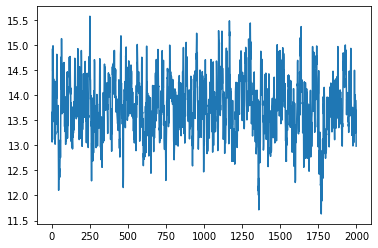

In [95]:
plt.plot(torch.as_tensor(theta).norm(dim=1))

In [96]:
theta=torch.as_tensor(theta)
theta_n=theta-theta.mean()
corr = np.correlate(theta_n,theta_n,mode='full')/theta_n.shape[0]
corr = corr[corr.size//2:]



ValueError: object too deep for desired array

In [23]:
def ESS(x):
    """ Compute the effective sample size of estimand of interest. PyMC's implementation. """
    m_chains, n_iters = x.shape

    variogram = lambda t: (sum(sum((x[j][i] - x[j][i-t])**2 for i in range(t, n_iters)) for j in
                               range(m_chains)) / (m_chains * (n_iters - t)))

    post_var = gelman_rubin(x)

    t = 1
    rho = np.ones(n_iters)
    negative_autocorr = False

    # Iterate until the sum of consecutive estimates of autocorrelation is negative
    while not negative_autocorr and (t < n_iters):
        rho[t] = 1 - variogram(t) / (2 * post_var)

        if not t % 2:
            negative_autocorr = sum(rho[t-1:t+1]) < 0

        t += 1

    return int(m_chains * n_iters / (1 + 2*rho[1:t].sum()))

def gelman_rubin(x):
    """ Estimate the marginal posterior variance. PyMC's implementation. """
    m_chains, n = x.shape

    # Calculate between-chain variance
    B_over_n = ((np.mean(x, axis=1) - np.mean(x))**2).sum() / (m_chains - 1)

    # Calculate within-chain variances
    W = np.sum([(x[i] - xbar) ** 2 for i, xbar in enumerate(np.mean(x, 1))]) / (m_chains * (n - 1))

    # (over) estimate of variance
    s2 = W * (n - 1) / n + B_over_n

    return s2

In [98]:

ESS(theta_n.numpy())

311696

In [101]:
theta_n.shape[0]*theta_n.shape[1]

301849

In [104]:

samples.shape, theta.shape

(torch.Size([6000, 151]), torch.Size([1999, 151]))

tensor(-2.5333)


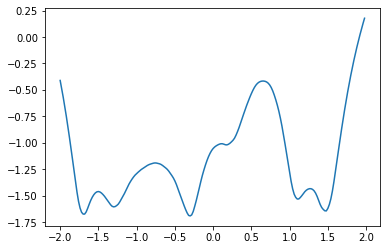

In [40]:
import seaborn as sns

#sns.distplot(pred_[:,100])
plt.plot(X,K)
print(NNE(pred_[:,100].unsqueeze(-1),1,device))

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

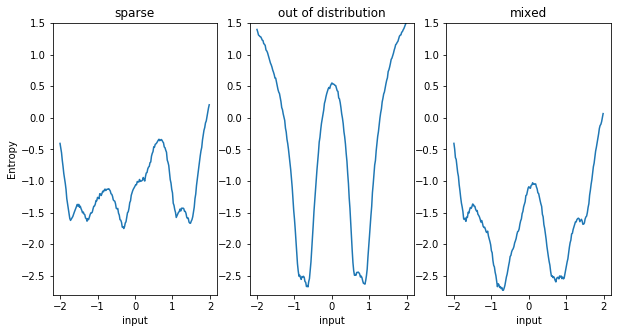

In [68]:
title=['sparse','out of distribution', 'mixed']
fig, ax= plt.subplots(1,3, figsize=(10,5))
for i in range(len(theta)):
    ax[i].plot(X,ED[i])
    ax[i].set_ylim(-2.8,1.5)
    ax[i].set_title(title[i])
    ax[i].set_xlabel('input')
ax[0].set_ylabel('Entropy')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

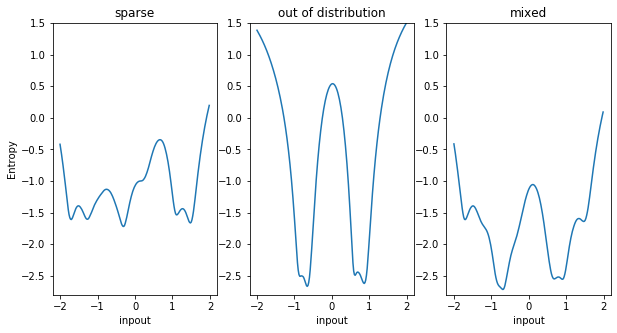

In [58]:
title=['sparse','out of distribution', 'mixed']
fig, ax= plt.subplots(1,3, figsize=(10,5))
for i in range(len(theta)):
    ax[i].plot(X,ED_[i])
    ax[i].set_ylim(-2.8,1.5)
    ax[i].set_title(title[i])
    ax[i].set_xlabel('input')
ax[0].set_ylabel('Entropy')
plt.tight_layout

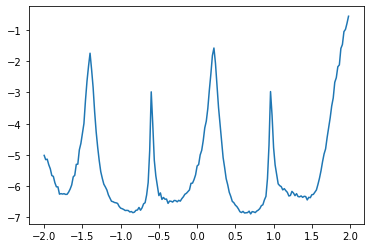

In [13]:
plt.plot(X,K)

In [74]:
NNE(theta_ood,k=1,device=device)

tensor(187.5856)

In [20]:
import emcee
emcee.autocorr.integrated_time(samples, c=5, tol=50, quiet=False)

NameError: name 'samples' is not defined

In [22]:
for i in range(len(theta)):
    print(emcee.autocorr.integrated_time(theta[i], c=5, tol=50, quiet=False))

[6.30528152]
[18.79204281]
[31.99413624]


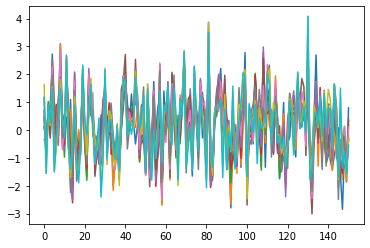

In [94]:
%matplotlib inline
for i in range(10):#theta.shape[1]):
    plt.plot(theta[i])

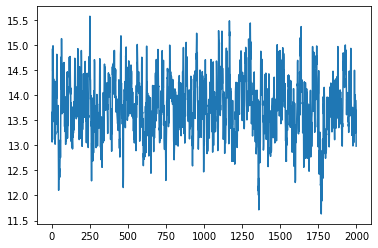

In [95]:
plt.plot(torch.as_tensor(theta).norm(dim=1))

In [96]:
theta=torch.as_tensor(theta)
theta_n=theta-theta.mean()
corr = np.correlate(theta_n,theta_n,mode='full')/theta_n.shape[0]
corr = corr[corr.size//2:]



ValueError: object too deep for desired array

In [23]:
def ESS(x):
    """ Compute the effective sample size of estimand of interest. PyMC's implementation. """
    m_chains, n_iters = x.shape

    variogram = lambda t: (sum(sum((x[j][i] - x[j][i-t])**2 for i in range(t, n_iters)) for j in
                               range(m_chains)) / (m_chains * (n_iters - t)))

    post_var = gelman_rubin(x)

    t = 1
    rho = np.ones(n_iters)
    negative_autocorr = False

    # Iterate until the sum of consecutive estimates of autocorrelation is negative
    while not negative_autocorr and (t < n_iters):
        rho[t] = 1 - variogram(t) / (2 * post_var)

        if not t % 2:
            negative_autocorr = sum(rho[t-1:t+1]) < 0

        t += 1

    return int(m_chains * n_iters / (1 + 2*rho[1:t].sum()))

def gelman_rubin(x):
    """ Estimate the marginal posterior variance. PyMC's implementation. """
    m_chains, n = x.shape

    # Calculate between-chain variance
    B_over_n = ((np.mean(x, axis=1) - np.mean(x))**2).sum() / (m_chains - 1)

    # Calculate within-chain variances
    W = np.sum([(x[i] - xbar) ** 2 for i, xbar in enumerate(np.mean(x, 1))]) / (m_chains * (n - 1))

    # (over) estimate of variance
    s2 = W * (n - 1) / n + B_over_n

    return s2

In [98]:

ESS(theta_n.numpy())

311696

In [101]:
theta_n.shape[0]*theta_n.shape[1]

301849

In [104]:

samples.shape, theta.shape

(torch.Size([6000, 151]), torch.Size([1999, 151]))

In [55]:
dim=3
G=torch.distributions.multivariate_normal.MultivariateNormal(torch.ones(dim), 1.*torch.eye(dim))
G01=torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim), torch.eye(dim))

In [56]:
G.entropy()


tensor(4.2568)

In [57]:
test_sample=G.sample((1000,))
prior_sample=G01.sample((1000,))

In [58]:
NNE(test_sample,k=1,device=device)

tensor(4.2536)

In [59]:
EntropyKDE(test_sample,device)

tensor(4.1375)

In [60]:
KL(test_sample,prior_sample,k=3)

tensor(1.1832)

In [6]:
K=torch.Tensor(151)
K_=torch.Tensor(151)
K_t=torch.Tensor(151)
for dim in range(1,151):

    mu=1.*torch.ones(dim)
    
    G=torch.distributions.multivariate_normal.MultivariateNormal(mu, 1.*torch.eye(dim))
    G01=torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim), torch.eye(dim))

    test_sample=G.sample((1000,))
    prior_sample=G01.sample((1000,))
    
    K_[dim]=KL(prior_sample,test_sample,k=2,p=2)
    K_t[dim]=KL(prior_sample,test_sample,k=2,p=1)
    
    sigma=1.*torch.ones(dim)
    K[dim]=0.5*(mu**2+sigma**2-(sigma**2).log()-1).sum()

Text(0.5, 0, 'dimension')

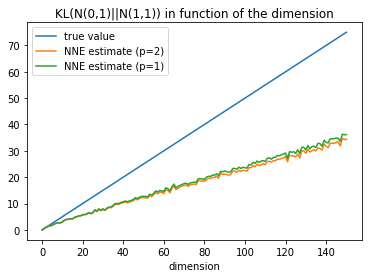

In [7]:
plt.plot(K, label='true value')
plt.plot(K_, label='NNE estimate (p=2)')
plt.plot(K_t, label='NNE estimate (p=1)')
plt.title('KL(N(0,1)||N(1,1)) in function of the dimension')
plt.legend()
plt.xlabel('dimension')

In [23]:
5**5

3125

In [ ]:
K_=torch.Tensor(4)
    
dim=20

G=torch.distributions.multivariate_normal.MultivariateNormal(torch.ones(dim), 1.*torch.eye(dim))

G01=torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim), torch.eye(dim))

for N in range(1,6):


    test_sample=G.sample((10**N,))
    prior_sample=G01.sample((10**N,))
    
    K_[N-1]=KL(prior_sample,test_sample,k=1)
    


In [51]:
mu=torch.ones(dim)
sigma=1.*torch.ones(dim)
K=0.5*(mu**2+sigma**2-(sigma**2).log()-1).sum()*torch.ones(4)

Text(0.5, 0, 'log base 10 sample size')

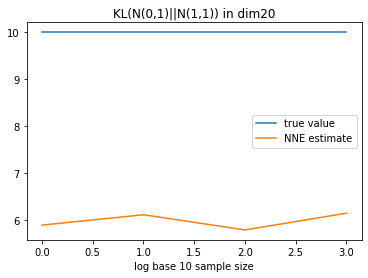

In [52]:
plt.plot(K, label='true value')
plt.plot(K_, label='NNE estimate')
plt.title('KL(N(0,1)||N(1,1)) in dim'+str(dim))
plt.legend()
plt.xlabel('log base 10 sample size')

In [84]:
K=torch.Tensor(151)
K_=torch.Tensor(151)
for dim in range(1,151):

    G01=torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim), torch.eye(dim))

    test_sample=G.sample((1000,))
    prior_sample=G.sample((1000,))
    
    K_[dim]=KL(prior_sample,test_sample,k=1)
    
    mu=torch.ones(dim)
    sigma=1.*torch.ones(dim)
    K[dim]=0.5*(mu**2+sigma**2-(sigma**2).log()-1).sum()

Text(0.5, 0, 'dimension')

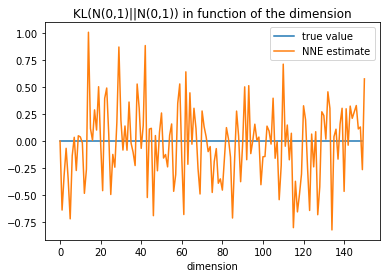

In [83]:
plt.plot(torch.zeros(150), label='true value')
plt.plot(K_, label='NNE estimate')
plt.title('KL(N(0,1)||N(0,1)) in function of the dimension')
plt.legend()
plt.xlabel('dimension')

In [70]:
E=torch.Tensor(151)
E_=torch.Tensor(151)
E_KDE=torch.Tensor(151)
for dim in range(1,151):

    G01=torch.distributions.multivariate_normal.MultivariateNormal(torch.zeros(dim), torch.eye(dim))

    prior_sample=G01.sample((1000,))
    
    E_[dim]=NNE(prior_sample,k=1,device=device)
    E_KDE[dim]=EntropyKDE(prior_sample,device)
    
    E[dim]=G01.entropy()

Text(0.5, 0, 'dimension')

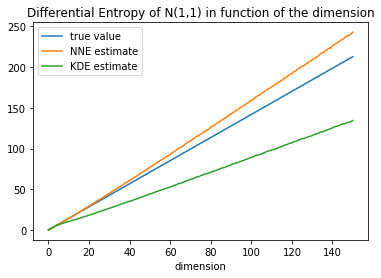

In [79]:
plt.plot(E, label='true value')
plt.plot(E_, label='NNE estimate')
plt.plot(E_KDE, label='KDE estimate')
plt.title('Differential Entropy of N(1,1) in function of the dimension')
plt.legend()
plt.xlabel('dimension')